In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from warnings import filterwarnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')
plt.rcParams['figure.figsize'] = (12,7)
plt.rc("font", size=14)
from scipy.stats import chi2, chi2_contingency
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from sklearn.model_selection import train_test_split
from sklearn.utils import resample
import statsmodels.api as sm
import statsmodels.formula.api as smf

In [965]:
data = pd.read_csv('D:/Machine Learning/Logistic Regression/Vaccine Usage Prediction/h1n1_vaccine_prediction.csv')
data.sample(10)

,unique_id,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,...,race,sex,income_level,marital_status,housing_status,employment,census_msa,no_of_adults,no_of_children,h1n1_vaccine
885,885,2.0,1.0,0.0,NaN,0.0,0.0,0.0,0.0,NaN,...,White,Female,NaN,Married,Own,Not in Labor Force,"MSA, Principle City",1.0,0.0,0
22427,22427,3.0,1.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,NaN,NaN,NaN,NaN,"MSA, Principle City",0.0,0.0,0
1587,1587,1.0,2.0,0.0,1.0,1.0,1.0,1.0,0.0,1.0,...,White,Female,NaN,Married,Own,Not in Labor Force,Non-MSA,1.0,2.0,0
17880,17880,2.0,2.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Principle City",1.0,0.0,1
17520,17520,1.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,1.0,...,White,Female,NaN,Not Married,Own,Not in Labor Force,"MSA, Not Principle City",0.0,0.0,0
11769,11769,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Married,Own,Employed,"MSA, Not Principle City",2.0,0.0,0
10941,10941,2.0,1.0,0.0,1.0,0.0,1.0,1.0,0.0,1.0,...,White,Female,"<= $75,000, Above Poverty",Not Married,Own,Employed,Non-MSA,0.0,1.0,0
13256,13256,3.0,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Principle City",0.0,0.0,0
19793,19793,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,White,Male,"<= $75,000, Above Poverty",Not Married,Own,Employed,"MSA, Principle City",2.0,0.0,0
8080,8080,3.0,1.0,0.0,1.0,0.0,1.0,1.0,1.0,1.0,...,Hispanic,Female,"<= $75,000, Above Poverty",Married,Rent,Not in Labor Force,Non-MSA,1.0,2.0,0


In [966]:
data.drop(['unique_id'],axis = 1,inplace = True)

In [967]:
data.shape

(26707, 33)

In [968]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26707 entries, 0 to 26706
Data columns (total 33 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26615 non-null  float64
 1   h1n1_awareness             26591 non-null  float64
 2   antiviral_medication       26636 non-null  float64
 3   contact_avoidance          26499 non-null  float64
 4   bought_face_mask           26688 non-null  float64
 5   wash_hands_frequently      26665 non-null  float64
 6   avoid_large_gatherings     26620 non-null  float64
 7   reduced_outside_home_cont  26625 non-null  float64
 8   avoid_touch_face           26579 non-null  float64
 9   dr_recc_h1n1_vacc          24547 non-null  float64
 10  dr_recc_seasonal_vacc      24547 non-null  float64
 11  chronic_medic_condition    25736 non-null  float64
 12  cont_child_undr_6_mnths    25887 non-null  float64
 13  is_health_worker           25903 non-null  flo

In [969]:
data.describe()

,h1n1_worry,h1n1_awareness,antiviral_medication,contact_avoidance,bought_face_mask,wash_hands_frequently,avoid_large_gatherings,reduced_outside_home_cont,avoid_touch_face,dr_recc_h1n1_vacc,...,has_health_insur,is_h1n1_vacc_effective,is_h1n1_risky,sick_from_h1n1_vacc,is_seas_vacc_effective,is_seas_risky,sick_from_seas_vacc,no_of_adults,no_of_children,h1n1_vaccine
count,26615.000000,26591.000000,26636.000000,26499.000000,26688.000000,26665.000000,26620.00000,26625.000000,26579.000000,24547.000000,...,14433.00000,26316.000000,26319.000000,26312.000000,26245.000000,26193.000000,26170.000000,26458.000000,26458.000000,26707.000000
mean,1.618486,1.262532,0.048844,0.725612,0.068982,0.825614,0.35864,0.337315,0.677264,0.220312,...,0.87972,3.850623,2.342566,2.357670,4.025986,2.719162,2.118112,0.886499,0.534583,0.212454
std,0.910311,0.618149,0.215545,0.446214,0.253429,0.379448,0.47961,0.472802,0.467531,0.414466,...,0.32530,1.007436,1.285539,1.362766,1.086565,1.385055,1.332950,0.753422,0.928173,0.409052
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000,...,0.00000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000
25%,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000,0.00000,0.000000,0.000000,0.000000,...,1.00000,3.000000,1.000000,1.000000,4.000000,2.000000,1.000000,0.000000,0.000000,0.000000
50%,2.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.00000,0.000000,1.000000,0.000000,...,1.00000,4.000000,2.000000,2.000000,4.000000,2.000000,2.000000,1.000000,0.000000,0.000000
75%,2.000000,2.000000,0.000000,1.000000,0.000000,1.000000,1.00000,1.000000,1.000000,0.000000,...,1.00000,5.000000,4.000000,4.000000,5.000000,4.000000,4.000000,1.000000,1.000000,0.000000
max,3.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.00000,1.000000,1.000000,1.000000,...,1.00000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,3.000000,3.000000,1.000000


In [970]:
data.isnull().sum()

h1n1_worry                      92
h1n1_awareness                 116
antiviral_medication            71
contact_avoidance              208
bought_face_mask                19
wash_hands_frequently           42
avoid_large_gatherings          87
reduced_outside_home_cont       82
avoid_touch_face               128
dr_recc_h1n1_vacc             2160
dr_recc_seasonal_vacc         2160
chronic_medic_condition        971
cont_child_undr_6_mnths        820
is_health_worker               804
has_health_insur             12274
is_h1n1_vacc_effective         391
is_h1n1_risky                  388
sick_from_h1n1_vacc            395
is_seas_vacc_effective         462
is_seas_risky                  514
sick_from_seas_vacc            537
age_bracket                      0
qualification                 1407
race                             0
sex                              0
income_level                  4423
marital_status                1408
housing_status                2042
employment          

Text(0.5, 1.0, 'Heat Map of Nulls')

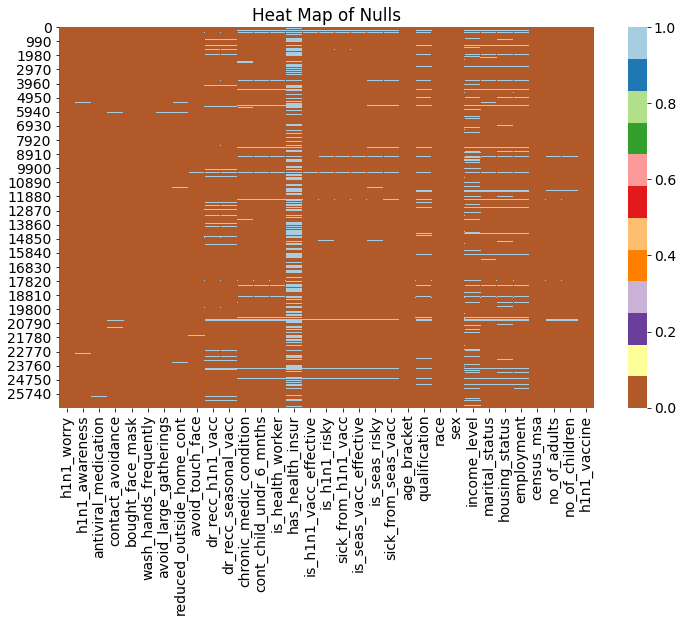

In [971]:
sns.heatmap(data.isnull(), cmap = 'Paired_r')
plt.title('Heat Map of Nulls')

# 

# 

# Response / Target Variable

# h1n1_vaccine

In [972]:
data.h1n1_vaccine.isnull().sum()

0

In [973]:
data.h1n1_vaccine.value_counts()

0    21033
1     5674
Name: h1n1_vaccine, dtype: int64

In [974]:
data.h1n1_vaccine.value_counts().sum()

26707

Text(0.5, 1.0, 'Count plot of h1n1_vaccine')

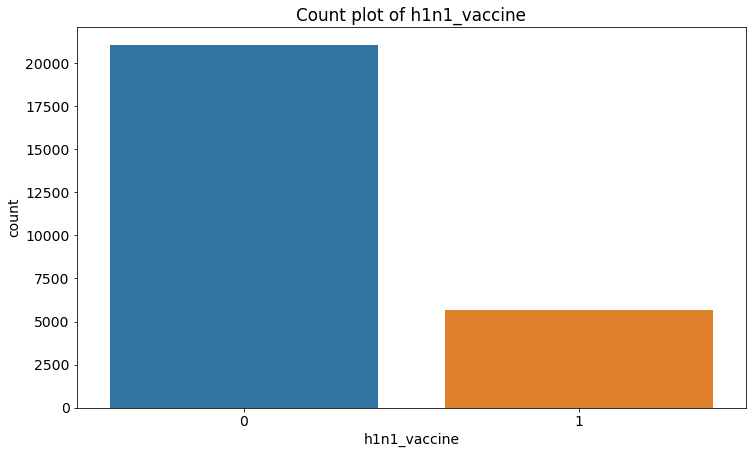

In [975]:
sns.countplot(data.h1n1_vaccine)
plt.title('Count plot of h1n1_vaccine')

# 

# 

# 0) h1n1_worry

In [976]:
data.h1n1_worry.isnull().sum()

92

In [977]:
data.h1n1_worry.value_counts()

2.0    10575
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [978]:
data.h1n1_worry.median()

2.0

In [979]:
data.h1n1_worry.fillna(data.h1n1_worry.median() , inplace = True)

In [980]:
data.h1n1_worry.isnull().sum()

0

In [981]:
data.h1n1_worry.describe()

count    26707.000000
mean         1.619800
std          0.909016
min          0.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          3.000000
Name: h1n1_worry, dtype: float64

In [982]:
data.h1n1_worry.value_counts()

2.0    10667
1.0     8153
3.0     4591
0.0     3296
Name: h1n1_worry, dtype: int64

In [983]:
data.h1n1_worry.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of h1n1_worry')

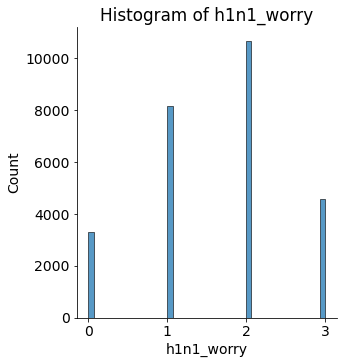

In [984]:
sns.displot(data.h1n1_worry)
plt.title('Histogram of h1n1_worry')

Text(0.5, 1.0, 'distribution plot of h1n1_worry')

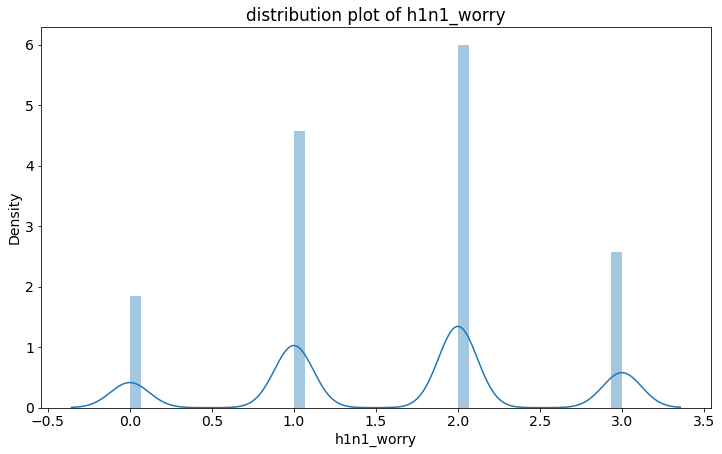

In [985]:
sns.distplot(data.h1n1_worry)
plt.title('distribution plot of h1n1_worry')

Text(0.5, 1.0, 'Count plot of h1n1_worry')

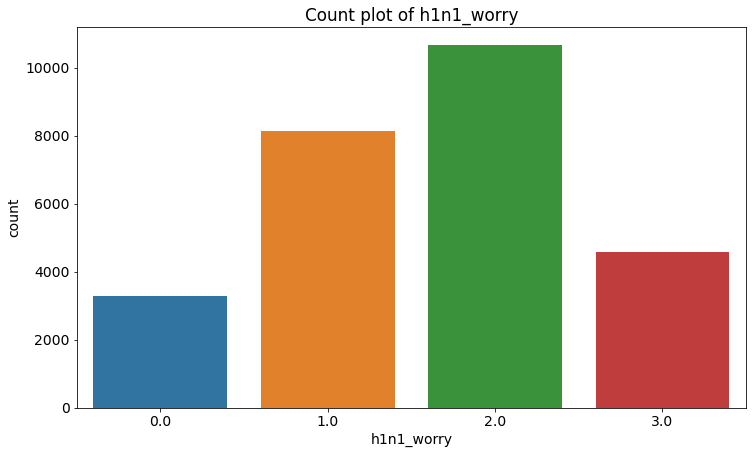

In [986]:
sns.countplot(data.h1n1_worry)
plt.title('Count plot of h1n1_worry')

Text(0.5, 1.0, 'BoxPlot Of h1n1_worry')

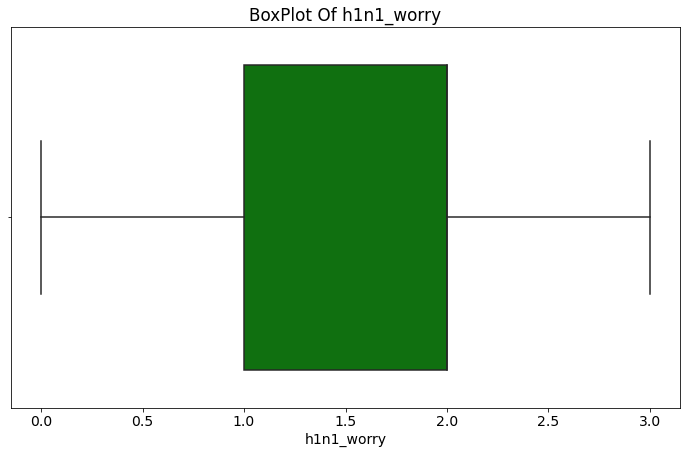

In [987]:
sns.boxplot(data.h1n1_worry, color = 'g')
plt.title('BoxPlot Of h1n1_worry')

In [988]:
data.groupby('h1n1_worry')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
h1n1_worry,,,,,,,,
0.0,3296.0,0.135619,0.342435,0.0,0.0,0.0,0.0,1.0
1.0,8153.0,0.171348,0.376836,0.0,0.0,0.0,0.0,1.0
2.0,10667.0,0.233336,0.422974,0.0,0.0,0.0,0.0,1.0
3.0,4591.0,0.292093,0.454774,0.0,0.0,0.0,1.0,1.0


In [989]:
mod_hw = ols('h1n1_vaccine ~ h1n1_worry', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
h1n1_worry,1.0,66.045848,66.045848,400.626361,1.794342e-88
Residual,26705.0,4402.492063,0.164856,NaN,NaN


In [990]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.h1n1_worry, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.0    1.0   0.0357 0.001 0.0142 0.0573   True
   0.0    2.0   0.0977 0.001 0.0769 0.1185   True
   0.0    3.0   0.1565 0.001 0.1327 0.1803   True
   1.0    2.0    0.062 0.001 0.0466 0.0773   True
   1.0    3.0   0.1207 0.001 0.1015   0.14   True
   2.0    3.0   0.0588 0.001 0.0403 0.0772   True
-------------------------------------------------


Text(0.5, 1.0, 'h1n1_worry VS  h1n1_vaccine')

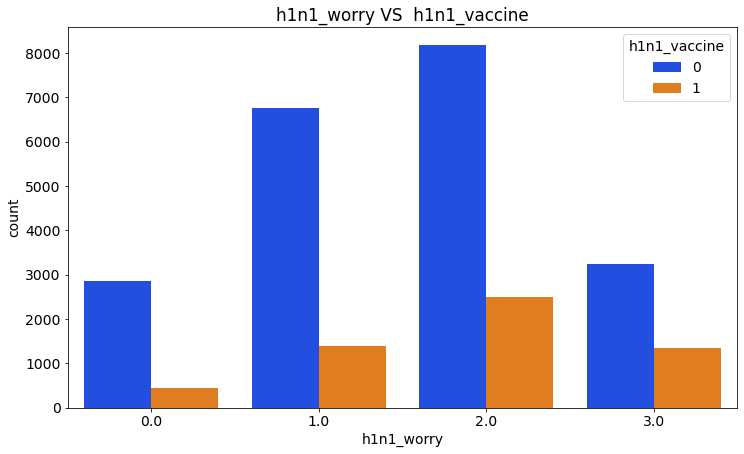

In [991]:
sns.countplot(data.h1n1_worry, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('h1n1_worry VS  h1n1_vaccine')

Text(0.5, 1.0, 'Boxplot Of h1n1_worry vs h1n1_vaccine')

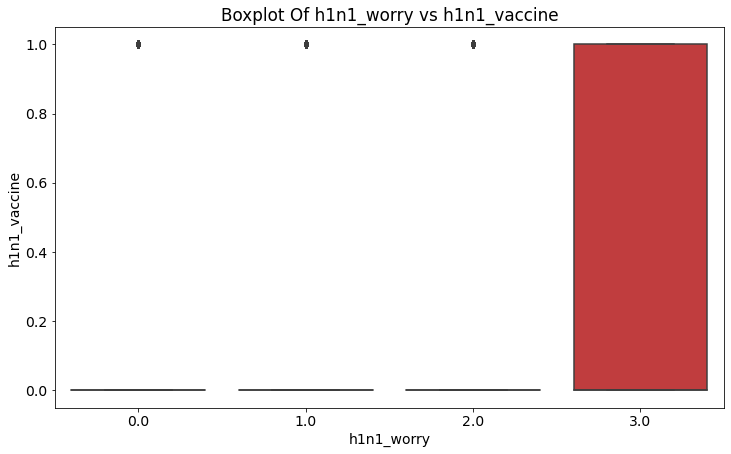

In [992]:
sns.boxplot(x = 'h1n1_worry', y = 'h1n1_vaccine', data = data)
plt.title('Boxplot Of h1n1_worry vs h1n1_vaccine')

**Good Predictor**

# 

# 

# 1) h1n1_awareness

In [993]:
data.h1n1_awareness.isnull().sum()

116

In [994]:
data.h1n1_awareness.value_counts()

1.0    14598
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [995]:
data.h1n1_awareness.median()

1.0

In [996]:
data.h1n1_awareness.fillna(data.h1n1_awareness.median() , inplace = True)

In [997]:
data.h1n1_awareness.isnull().sum()

0

In [998]:
data.h1n1_awareness.describe()

count    26707.000000
mean         1.261392
std          0.617047
min          0.000000
25%          1.000000
50%          1.000000
75%          2.000000
max          2.000000
Name: h1n1_awareness, dtype: float64

In [999]:
data.h1n1_awareness.value_counts()

1.0    14714
2.0     9487
0.0     2506
Name: h1n1_awareness, dtype: int64

In [1000]:
data.h1n1_awareness.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of h1n1_awareness')

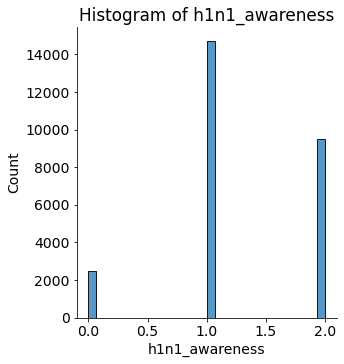

In [1001]:
sns.displot(data.h1n1_awareness)
plt.title('Histogram of h1n1_awareness')

Text(0.5, 1.0, 'distribution plot of h1n1_awareness')

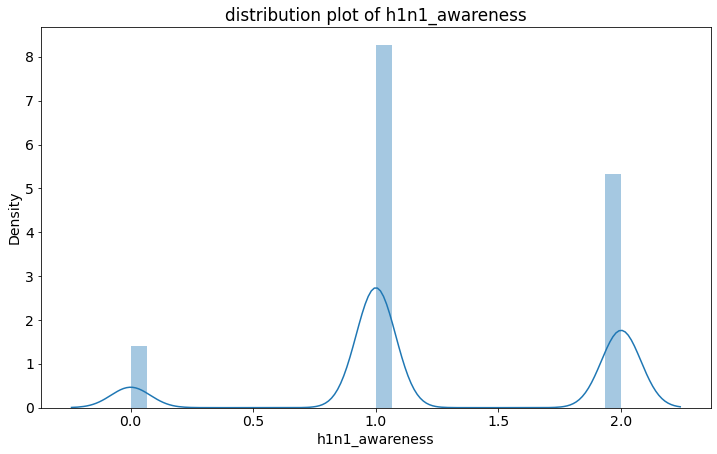

In [1002]:
sns.distplot(data.h1n1_awareness)
plt.title('distribution plot of h1n1_awareness')

Text(0.5, 1.0, 'Count plot of h1n1_awareness')

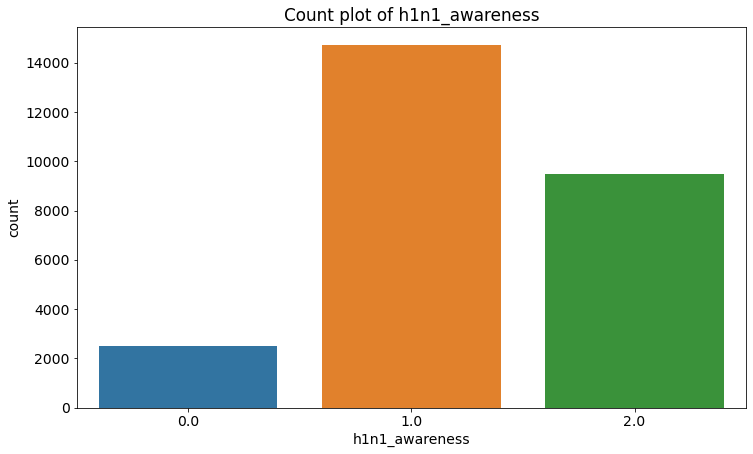

In [1003]:
sns.countplot(x = 'h1n1_awareness', data = data)
plt.title('Count plot of h1n1_awareness')

Text(0.5, 1.0, 'BoxPlot Of h1n1_awareness')

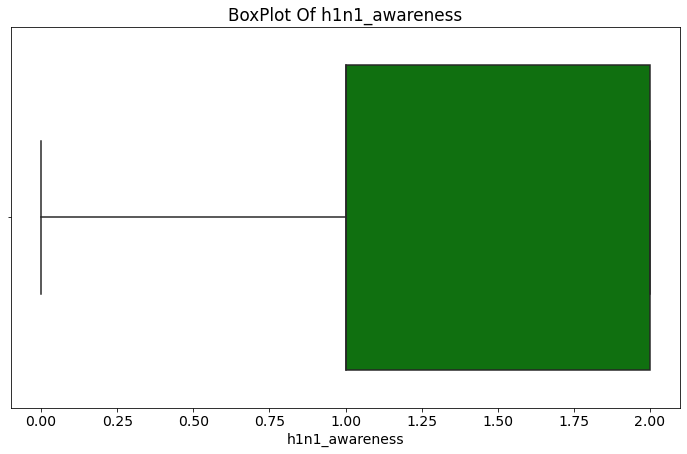

In [1004]:
sns.boxplot(data.h1n1_awareness, color = 'g')
plt.title('BoxPlot Of h1n1_awareness')

In [1005]:
data.groupby('h1n1_awareness')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
h1n1_awareness,,,,,,,,
0.0,2506.0,0.144054,0.351215,0.0,0.0,0.0,0.0,1.0
1.0,14714.0,0.181800,0.385692,0.0,0.0,0.0,0.0,1.0
2.0,9487.0,0.278065,0.448069,0.0,0.0,0.0,1.0,1.0


In [1006]:
mod_ha = ols('h1n1_vaccine ~ h1n1_awareness', data = data).fit()
sm.stats.anova_lm(mod_ha)

,df,sum_sq,mean_sq,F,PR(>F)
h1n1_awareness,1.0,61.978906,61.978906,375.609788,4.188858e-83
Residual,26705.0,4406.559005,0.165009,NaN,NaN


In [1007]:
tukey_ha = pairwise_tukeyhsd(data.h1n1_vaccine, data.h1n1_awareness, alpha = 0.05)
print(tukey_ha)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.0    1.0   0.0377 0.001 0.0172 0.0583   True
   0.0    2.0    0.134 0.001 0.1126 0.1554   True
   1.0    2.0   0.0963 0.001 0.0837 0.1088   True
-------------------------------------------------


Text(0.5, 1.0, 'h1n1_awareness VS  h1n1_vaccine')

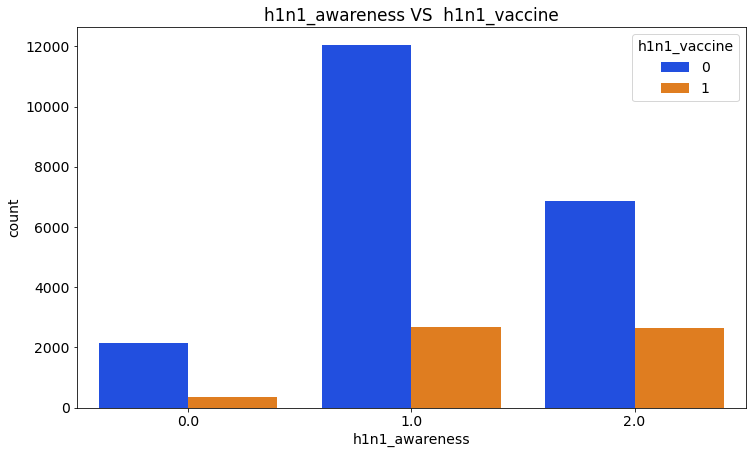

In [1008]:
sns.countplot(data.h1n1_awareness, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('h1n1_awareness VS  h1n1_vaccine')

Text(0.5, 1.0, 'Boxplot Of h1n1_awareness vs h1n1_vaccine')

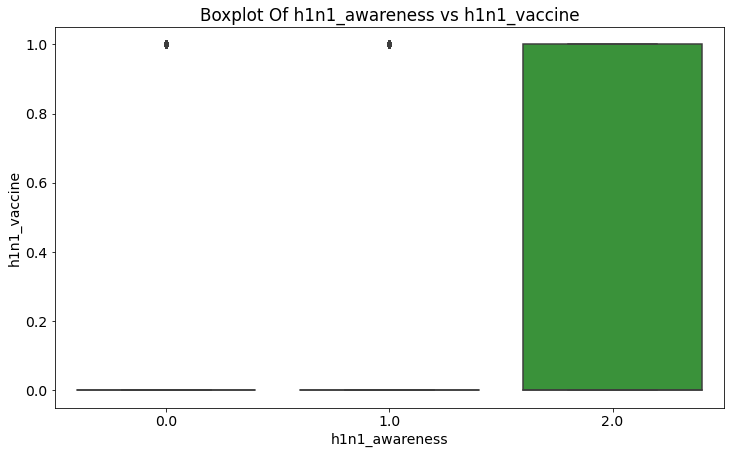

In [1009]:
sns.boxplot(x = 'h1n1_awareness', y = 'h1n1_vaccine', data = data)
plt.title('Boxplot Of h1n1_awareness vs h1n1_vaccine')

**Good Predictor**

# 

# 

# 2) antiviral_medication

In [1010]:
data.antiviral_medication.isnull().sum()

71

In [1011]:
data.antiviral_medication.value_counts()

0.0    25335
1.0     1301
Name: antiviral_medication, dtype: int64

In [1012]:
data.antiviral_medication.mode()

0    0.0
dtype: float64

In [1013]:
data.antiviral_medication.fillna(data.antiviral_medication.mode()[0] , inplace = True)

In [1014]:
data.antiviral_medication.isnull().sum()

0

In [1015]:
data.antiviral_medication.value_counts()

0.0    25406
1.0     1301
Name: antiviral_medication, dtype: int64

Text(0.5, 1.0, 'Count plot of antiviral_medication')

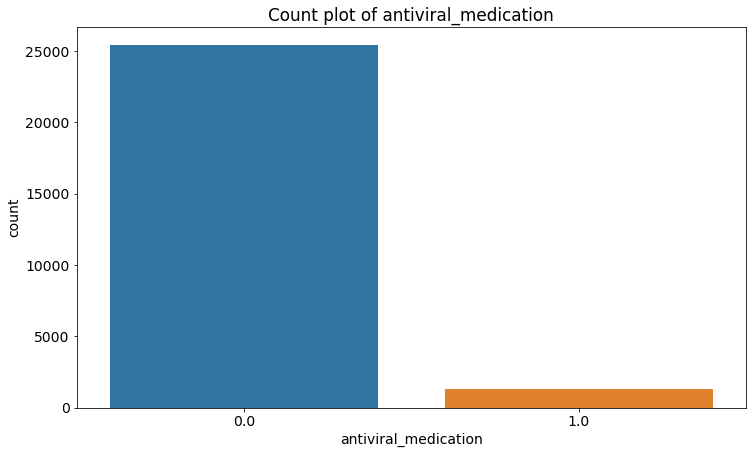

In [1016]:
sns.countplot(x = 'antiviral_medication', data = data)
plt.title('Count plot of antiviral_medication')

In [1017]:
ct_am = pd.crosstab(data.antiviral_medication , data.h1n1_vaccine)
ct_am

h1n1_vaccine,0,1
antiviral_medication,,
0.0,20103,5303
1.0,930,371


In [1018]:
chi2_contingency(ct_am, correction = False)

(43.21485853065721,
 4.904680004058131e-11,
 1,
 array([[20008.40221665,  5397.59778335],
        [ 1024.59778335,   276.40221665]]))

Text(0.5, 1.0, 'antiviral_medication  VS  h1n1_vaccine')

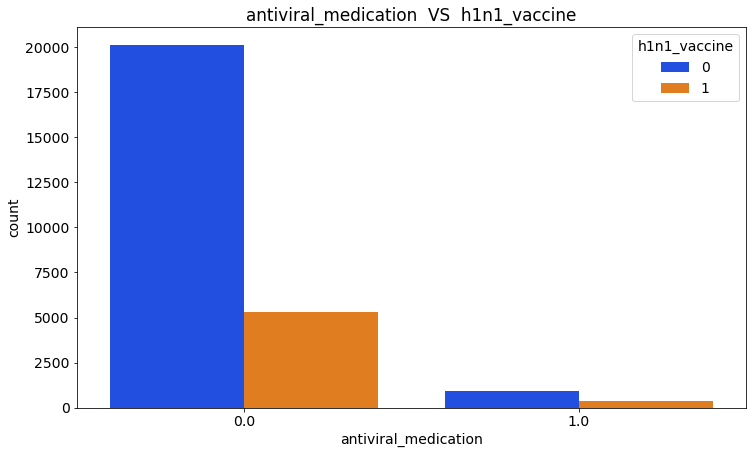

In [1019]:
sns.countplot(data.antiviral_medication , hue = data.h1n1_vaccine, palette = 'bright')
plt.title('antiviral_medication  VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 3) contact_avoidance

In [1020]:
data.contact_avoidance.isnull().sum()

208

In [1021]:
data.contact_avoidance.value_counts()

1.0    19228
0.0     7271
Name: contact_avoidance, dtype: int64

In [1022]:
data.contact_avoidance.mode()

0    1.0
dtype: float64

In [1023]:
data.contact_avoidance.fillna(1, inplace = True)

In [1024]:
data.contact_avoidance.isnull().sum()

0

In [1025]:
data.contact_avoidance.value_counts()

1.0    19436
0.0     7271
Name: contact_avoidance, dtype: int64

Text(0.5, 1.0, 'count plot of contact_avoidance')

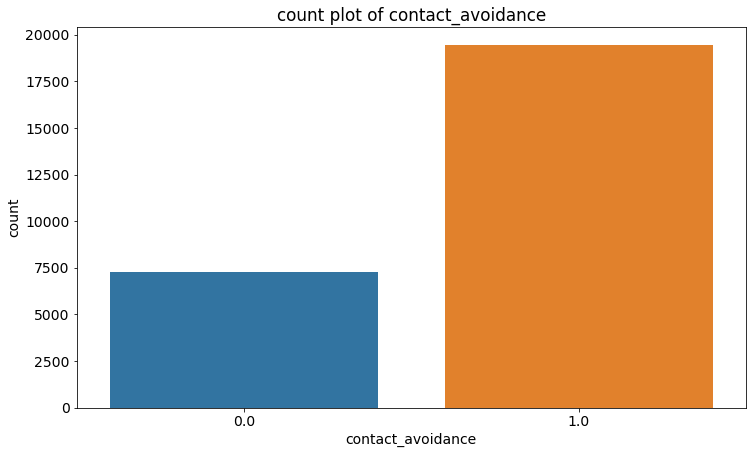

In [1026]:
sns.countplot(x = 'contact_avoidance', data = data)
plt.title('count plot of contact_avoidance')

In [1027]:
ct_ca = pd.crosstab(data.contact_avoidance, data.h1n1_vaccine)
ct_ca

h1n1_vaccine,0,1
contact_avoidance,,
0.0,5954,1317
1.0,15079,4357


In [1028]:
chi2_contingency(ct_ca, correction = False)

(58.587201164415866,
 1.9447747613873533e-14,
 1,
 array([[ 5726.24941027,  1544.75058973],
        [15306.75058973,  4129.24941027]]))

Text(0.5, 1.0, 'contact_avoidance VS  h1n1_vaccine')

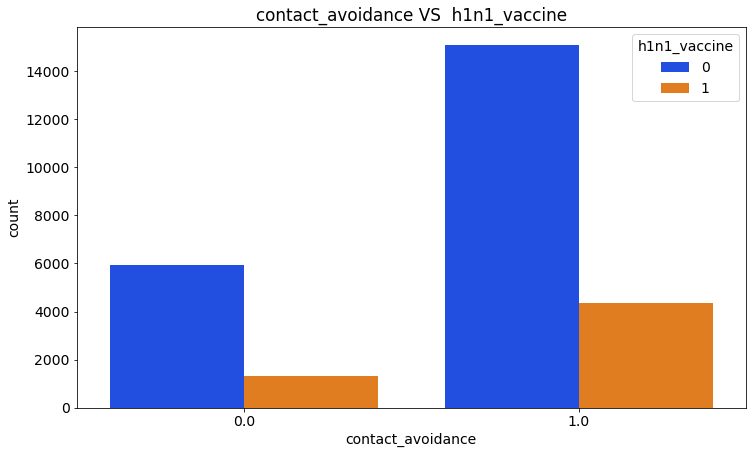

In [1029]:
sns.countplot(data.contact_avoidance, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('contact_avoidance VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 4) bought_face_mask

In [1030]:
data.bought_face_mask.isnull().sum()

19

In [1031]:
data.bought_face_mask.value_counts()

0.0    24847
1.0     1841
Name: bought_face_mask, dtype: int64

In [1032]:
data.bought_face_mask.mode()

0    0.0
dtype: float64

In [1033]:
data.bought_face_mask.fillna(0, inplace = True)

In [1034]:
data.bought_face_mask.isnull().sum()

0

In [1035]:
data.bought_face_mask.value_counts()

0.0    24866
1.0     1841
Name: bought_face_mask, dtype: int64

Text(0.5, 1.0, 'count plot of bought_face_mask')

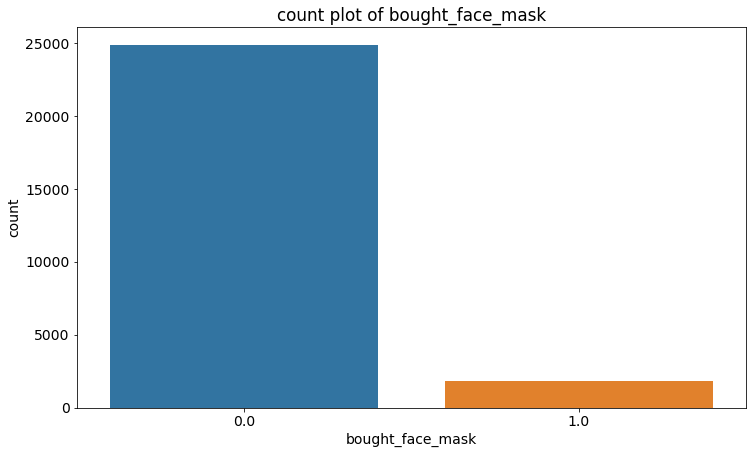

In [1036]:
sns.countplot(x = 'bought_face_mask', data = data)
plt.title('count plot of bought_face_mask')

In [1037]:
ct_bfm = pd.crosstab(data.bought_face_mask, data.h1n1_vaccine)
ct_bfm

h1n1_vaccine,0,1
bought_face_mask,,
0.0,19778,5088
1.0,1255,586


In [1038]:
chi2_contingency(ct_bfm, correction = False)

(132.4120533980558,
 1.2157495033471819e-30,
 1,
 array([[19583.12719512,  5282.87280488],
        [ 1449.87280488,   391.12719512]]))

Text(0.5, 1.0, 'bought_face_mask VS  h1n1_vaccine')

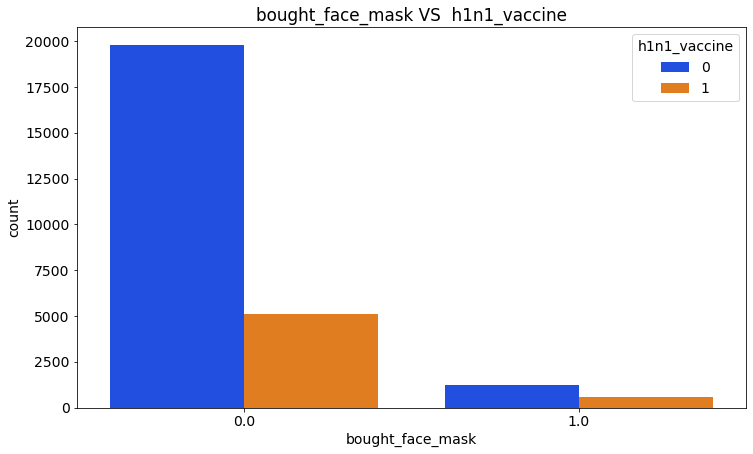

In [1039]:
sns.countplot(data.bought_face_mask, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('bought_face_mask VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 5) wash_hands_frequently

In [1040]:
data.wash_hands_frequently.isnull().sum()

42

In [1041]:
data.wash_hands_frequently.value_counts()

1.0    22015
0.0     4650
Name: wash_hands_frequently, dtype: int64

In [1042]:
data.wash_hands_frequently.mode()

0    1.0
dtype: float64

In [1043]:
data.wash_hands_frequently.fillna(1, inplace = True)

In [1044]:
data.wash_hands_frequently.isnull().sum()

0

In [1045]:
data.wash_hands_frequently.value_counts()

1.0    22057
0.0     4650
Name: wash_hands_frequently, dtype: int64

Text(0.5, 1.0, 'count plot of wash_hands_frequently')

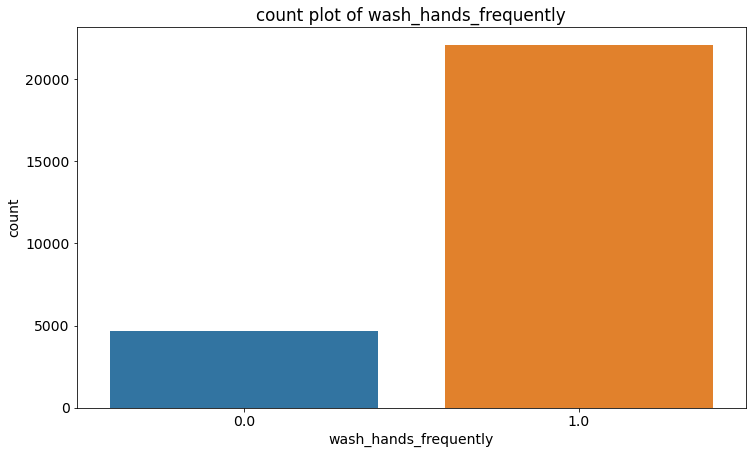

In [1046]:
sns.countplot(x = 'wash_hands_frequently', data = data)
plt.title('count plot of wash_hands_frequently')

In [1047]:
ct_whf = pd.crosstab(data.wash_hands_frequently, data.h1n1_vaccine)
ct_whf

h1n1_vaccine,0,1
wash_hands_frequently,,
0.0,3971,679
1.0,17062,4995


In [1048]:
chi2_contingency(ct_whf, correction = False)

(148.50736844984505,
 3.6747179620018487e-34,
 1,
 array([[ 3662.09046317,   987.90953683],
        [17370.90953683,  4686.09046317]]))

Text(0.5, 1.0, 'wash_hands_frequently VS  h1n1_vaccine')

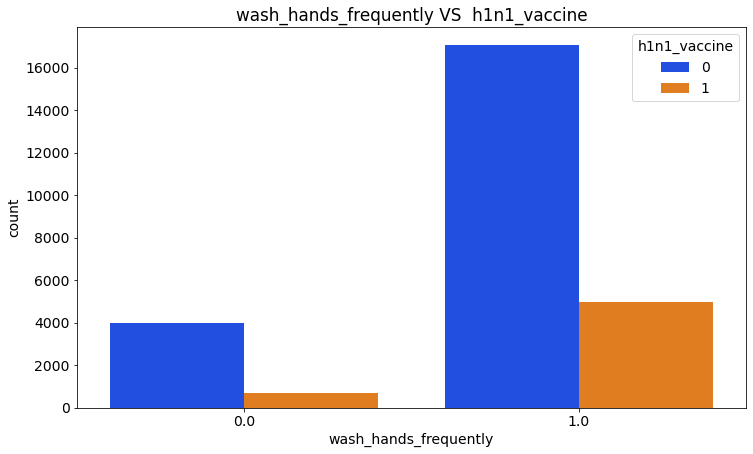

In [1049]:
sns.countplot(data.wash_hands_frequently, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('wash_hands_frequently VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 6) avoid_large_gatherings

In [1050]:
data.avoid_large_gatherings.isnull().sum()

87

In [1051]:
data.avoid_large_gatherings.value_counts()

0.0    17073
1.0     9547
Name: avoid_large_gatherings, dtype: int64

In [1052]:
data.avoid_large_gatherings.mode()

0    0.0
dtype: float64

In [1053]:
data.avoid_large_gatherings.fillna(0, inplace = True)

In [1054]:
data.avoid_large_gatherings.isnull().sum()

0

In [1055]:
data.avoid_large_gatherings.value_counts()

0.0    17160
1.0     9547
Name: avoid_large_gatherings, dtype: int64

Text(0.5, 1.0, 'count plot of avoid_large_gatherings')

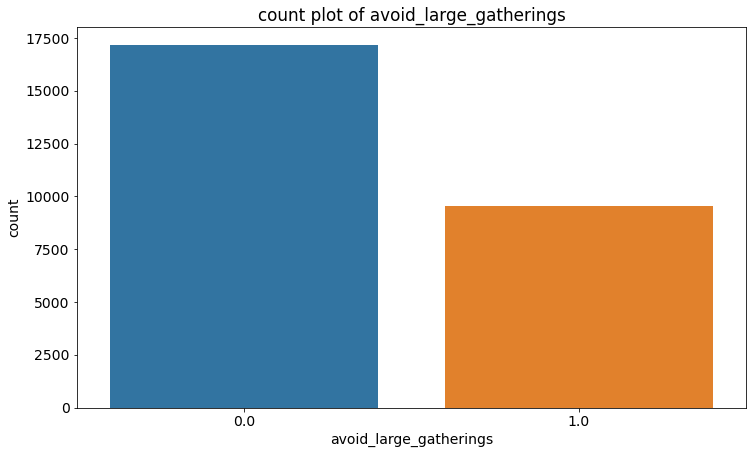

In [1056]:
sns.countplot(x = 'avoid_large_gatherings', data = data)
plt.title('count plot of avoid_large_gatherings')

In [1057]:
ct_alg = pd.crosstab(data.avoid_large_gatherings, data.h1n1_vaccine)
ct_alg

h1n1_vaccine,0,1
avoid_large_gatherings,,
0.0,13609,3551
1.0,7424,2123


In [1058]:
chi2_contingency(ct_alg, correction = False)

(8.738667138185196,
 0.0031153215196716723,
 1,
 array([[13514.29512862,  3645.70487138],
        [ 7518.70487138,  2028.29512862]]))

Text(0.5, 1.0, 'avoid_large_gatherings VS  h1n1_vaccine')

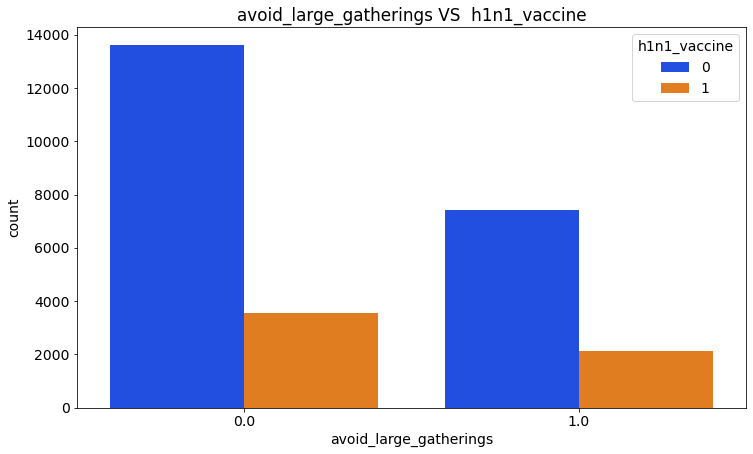

In [1059]:
sns.countplot(data.avoid_large_gatherings, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('avoid_large_gatherings VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 7) reduced_outside_home_cont

In [1060]:
data.reduced_outside_home_cont.isnull().sum()

82

In [1061]:
data.reduced_outside_home_cont.value_counts()

0.0    17644
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

In [1062]:
data.reduced_outside_home_cont.mode()

0    0.0
dtype: float64

In [1063]:
data.reduced_outside_home_cont.fillna(0, inplace = True)

In [1064]:
data.reduced_outside_home_cont.isnull().sum()

0

In [1065]:
data.reduced_outside_home_cont.value_counts()

0.0    17726
1.0     8981
Name: reduced_outside_home_cont, dtype: int64

Text(0.5, 1.0, 'count plot of reduced_outside_home_cont')

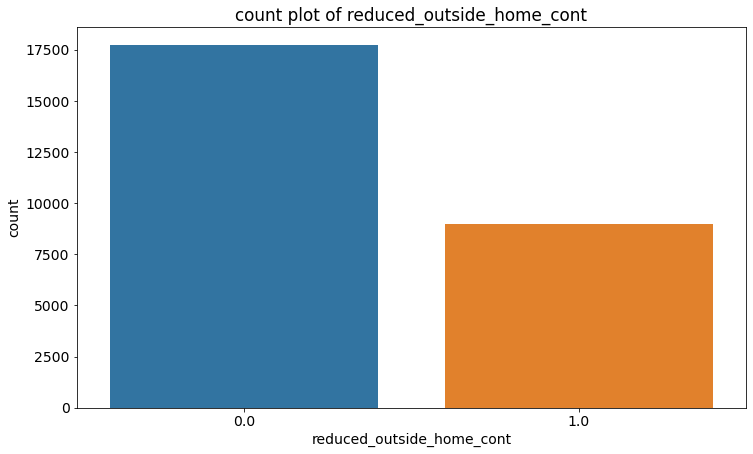

In [1066]:
sns.countplot(x = 'reduced_outside_home_cont', data = data)
plt.title('count plot of reduced_outside_home_cont')

In [1067]:
ct_rohc = pd.crosstab(data.reduced_outside_home_cont, data.h1n1_vaccine)
ct_rohc

h1n1_vaccine,0,1
reduced_outside_home_cont,,
0.0,14074,3652
1.0,6959,2022


In [1068]:
chi2_contingency(ct_rohc, correction = False)

(13.019843626723468,
 0.0003082075507773056,
 1,
 array([[13960.04635489,  3765.95364511],
        [ 7072.95364511,  1908.04635489]]))

Text(0.5, 1.0, 'reduced_outside_home_cont VS  h1n1_vaccine')

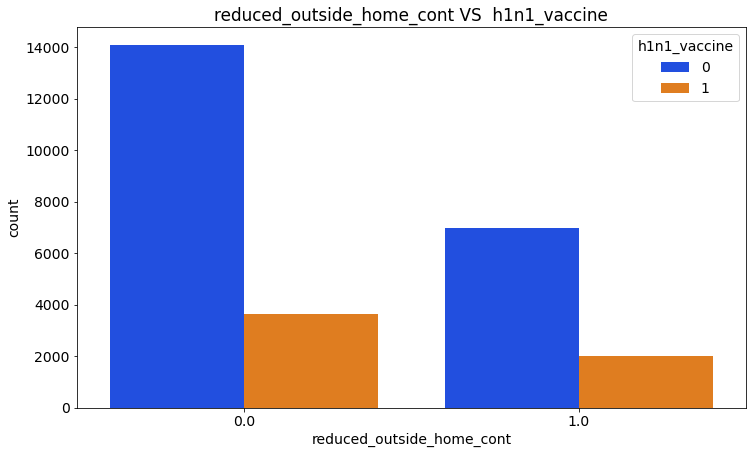

In [1069]:
sns.countplot(data.reduced_outside_home_cont, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('reduced_outside_home_cont VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 8) avoid_touch_face

In [1070]:
data.avoid_touch_face.isnull().sum()

128

In [1071]:
data.avoid_touch_face.value_counts()

1.0    18001
0.0     8578
Name: avoid_touch_face, dtype: int64

In [1072]:
data.avoid_touch_face.mode()

0    1.0
dtype: float64

In [1073]:
data.avoid_touch_face.fillna(1, inplace = True)

In [1074]:
data.avoid_touch_face.isnull().sum()

0

In [1075]:
data.avoid_touch_face.value_counts()

1.0    18129
0.0     8578
Name: avoid_touch_face, dtype: int64

Text(0.5, 1.0, 'count plot of avoid_touch_face')

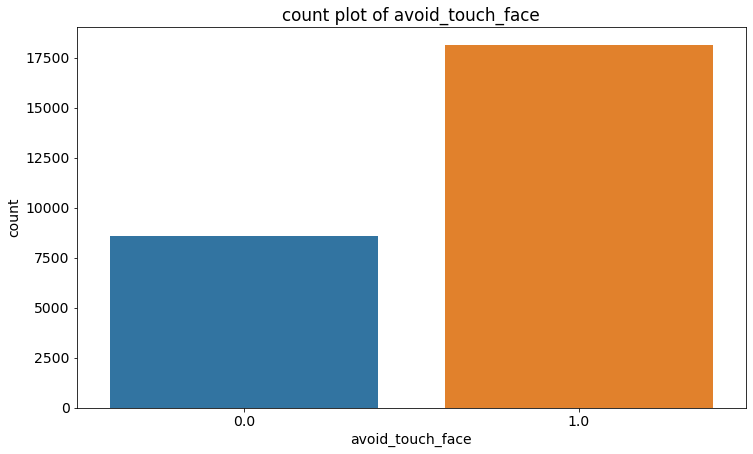

In [1076]:
sns.countplot(x = 'avoid_touch_face', data = data)
plt.title('count plot of avoid_touch_face')

In [1077]:
ct_atf = pd.crosstab(data.avoid_touch_face, data.h1n1_vaccine)
ct_atf

h1n1_vaccine,0,1
avoid_touch_face,,
0.0,7117,1461
1.0,13916,4213


In [1078]:
chi2_contingency(ct_atf, correction = False)

(134.08102789784252,
 5.245058803488217e-31,
 1,
 array([[ 6755.57247164,  1822.42752836],
        [14277.42752836,  3851.57247164]]))

Text(0.5, 1.0, 'avoid_touch_face VS  h1n1_vaccine')

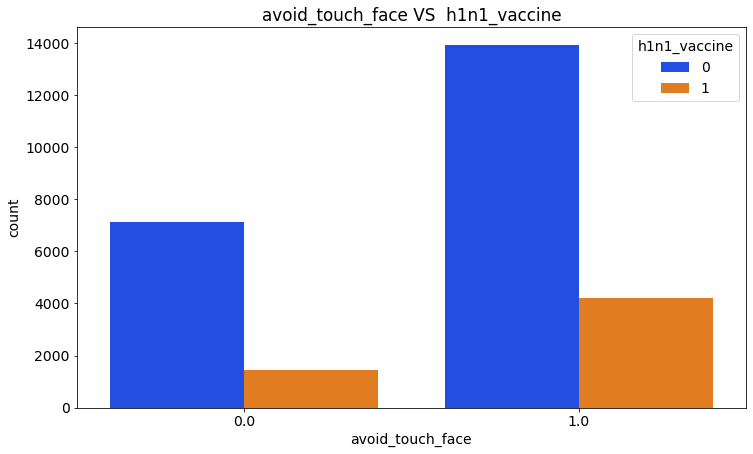

In [1079]:
sns.countplot(data.avoid_touch_face, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('avoid_touch_face VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 9) dr_recc_h1n1_vacc

In [1080]:
data.dr_recc_h1n1_vacc.isnull().sum()

2160

In [1081]:
data.dr_recc_h1n1_vacc.value_counts()

0.0    19139
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

In [1082]:
data.dr_recc_h1n1_vacc.mode()

0    0.0
dtype: float64

In [1083]:
data.dr_recc_h1n1_vacc.fillna(0, inplace = True)

In [1084]:
data.dr_recc_h1n1_vacc.isnull().sum()

0

In [1085]:
data.dr_recc_h1n1_vacc.value_counts()

0.0    21299
1.0     5408
Name: dr_recc_h1n1_vacc, dtype: int64

Text(0.5, 1.0, 'count plot of dr_recc_h1n1_vacc')

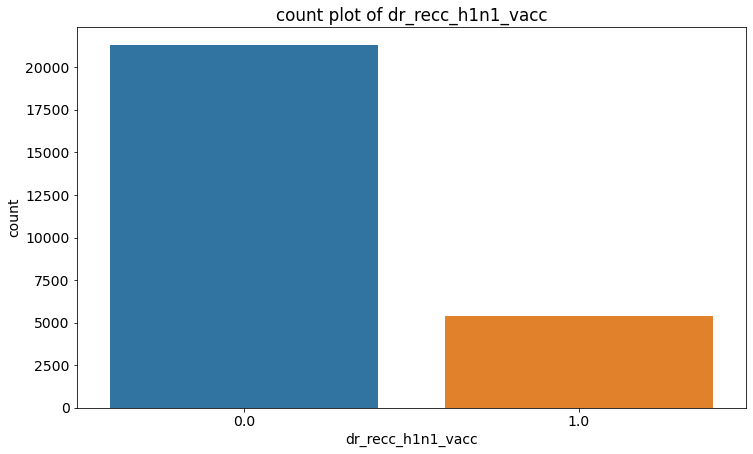

In [1086]:
sns.countplot(x = 'dr_recc_h1n1_vacc', data = data)
plt.title('count plot of dr_recc_h1n1_vacc')

In [1087]:
ct_drhv = pd.crosstab(data.dr_recc_h1n1_vacc, data.h1n1_vaccine)
ct_drhv

h1n1_vaccine,0,1
dr_recc_h1n1_vacc,,
0.0,18504,2795
1.0,2529,2879


In [1088]:
chi2_contingency(ct_drhv, correction = False)

(4147.691754581108,
 0.0,
 1,
 array([[16773.94941401,  4525.05058599],
        [ 4259.05058599,  1148.94941401]]))

Text(0.5, 1.0, 'dr_recc_h1n1_vacc VS  h1n1_vaccine')

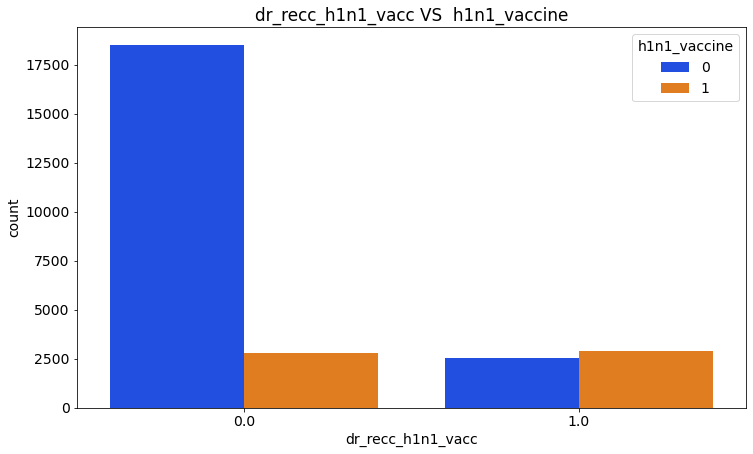

In [1089]:
sns.countplot(data.dr_recc_h1n1_vacc, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('dr_recc_h1n1_vacc VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 10) dr_recc_seasonal_vacc

In [1090]:
data.dr_recc_seasonal_vacc.isnull().sum()

2160

In [1091]:
data.dr_recc_seasonal_vacc.value_counts()

0.0    16453
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

In [1092]:
data.dr_recc_seasonal_vacc.mode()

0    0.0
dtype: float64

In [1093]:
data.dr_recc_seasonal_vacc.fillna(0, inplace = True)

In [1094]:
data.dr_recc_seasonal_vacc.isnull().sum()

0

In [1095]:
data.dr_recc_seasonal_vacc.value_counts()

0.0    18613
1.0     8094
Name: dr_recc_seasonal_vacc, dtype: int64

Text(0.5, 1.0, 'count plot of dr_recc_seasonal_vacc')

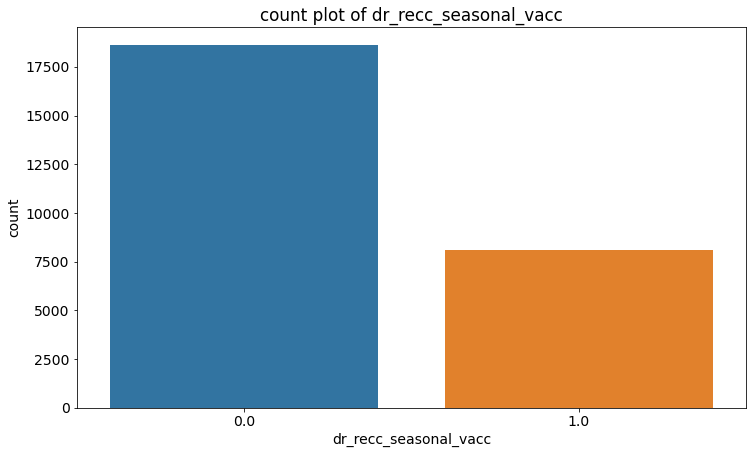

In [1096]:
sns.countplot(x = 'dr_recc_seasonal_vacc', data = data)
plt.title('count plot of dr_recc_seasonal_vacc')

In [1097]:
ct_drsc = pd.crosstab(data.dr_recc_seasonal_vacc, data.h1n1_vaccine)
ct_drsc

h1n1_vaccine,0,1
dr_recc_seasonal_vacc,,
0.0,15758,2855
1.0,5275,2819


In [1098]:
chi2_contingency(ct_drsc, correction = False)

(1280.6094117596108,
 1.8496635782763457e-280,
 1,
 array([[14658.59995507,  3954.40004493],
        [ 6374.40004493,  1719.59995507]]))

Text(0.5, 1.0, 'dr_recc_seasonal_vacc VS  h1n1_vaccine')

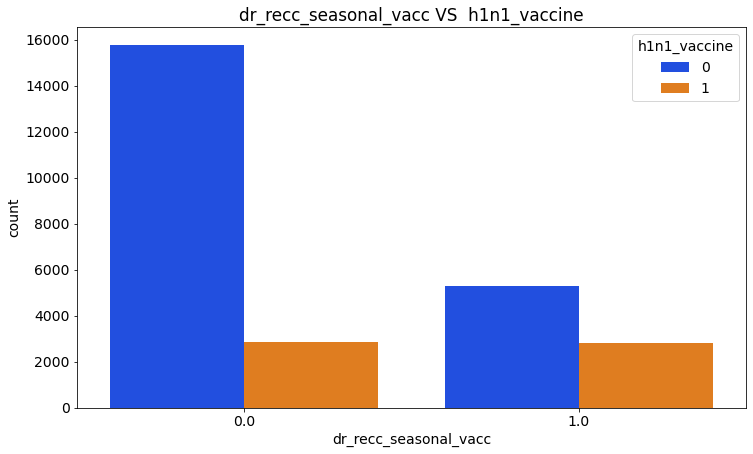

In [1099]:
sns.countplot(data.dr_recc_seasonal_vacc, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('dr_recc_seasonal_vacc VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 11) chronic_medic_condition

In [1100]:
data.chronic_medic_condition.isnull().sum()

971

In [1101]:
data.chronic_medic_condition.value_counts()

0.0    18446
1.0     7290
Name: chronic_medic_condition, dtype: int64

In [1102]:
data.chronic_medic_condition.mode()

0    0.0
dtype: float64

In [1103]:
data.chronic_medic_condition.fillna(0, inplace = True)

In [1104]:
data.chronic_medic_condition.isnull().sum()

0

In [1105]:
data.chronic_medic_condition.value_counts()

0.0    19417
1.0     7290
Name: chronic_medic_condition, dtype: int64

Text(0.5, 1.0, 'count plot of chronic_medic_condition')

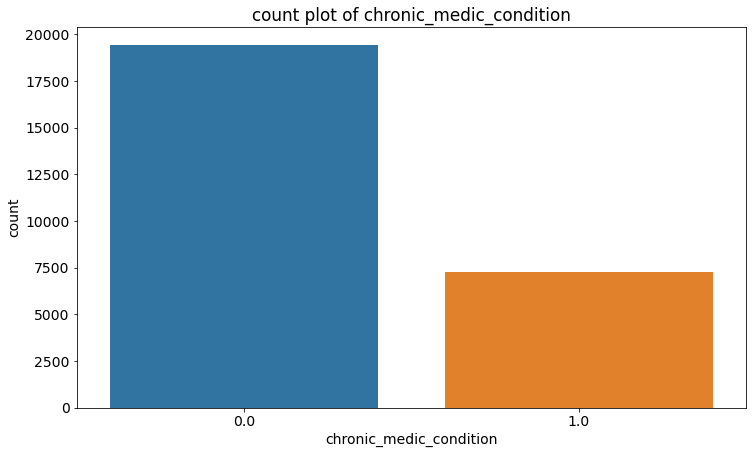

In [1106]:
sns.countplot(x = 'chronic_medic_condition', data = data)
plt.title('count plot of chronic_medic_condition')

In [1107]:
ct_cmc = pd.crosstab(data.chronic_medic_condition, data.h1n1_vaccine)
ct_cmc

h1n1_vaccine,0,1
chronic_medic_condition,,
0.0,15751,3666
1.0,5282,2008


In [1108]:
chi2_contingency(ct_cmc, correction = False)

(237.79518652408973,
 1.189768159211186e-53,
 1,
 array([[15291.78720935,  4125.21279065],
        [ 5741.21279065,  1548.78720935]]))

Text(0.5, 1.0, 'chronic_medic_condition  VS  h1n1_vaccine')

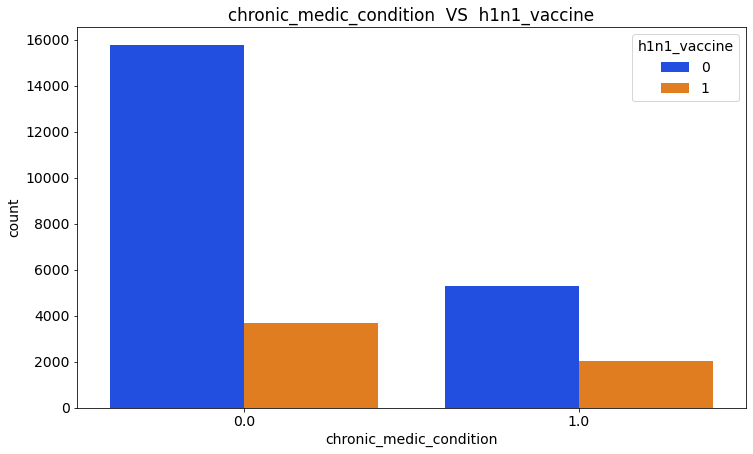

In [1109]:
sns.countplot(data.chronic_medic_condition, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('chronic_medic_condition  VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 12) cont_child_undr_6_mnths

In [1110]:
data.cont_child_undr_6_mnths.isnull().sum()

820

In [1111]:
data.cont_child_undr_6_mnths.value_counts()

0.0    23749
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

In [1112]:
data.cont_child_undr_6_mnths.mode()

0    0.0
dtype: float64

In [1113]:
data.cont_child_undr_6_mnths.fillna(0, inplace = True)

In [1114]:
data.cont_child_undr_6_mnths.isnull().sum()

0

In [1115]:
data.cont_child_undr_6_mnths.value_counts()

0.0    24569
1.0     2138
Name: cont_child_undr_6_mnths, dtype: int64

Text(0.5, 1.0, 'count plot of cont_child_undr_6_mnths')

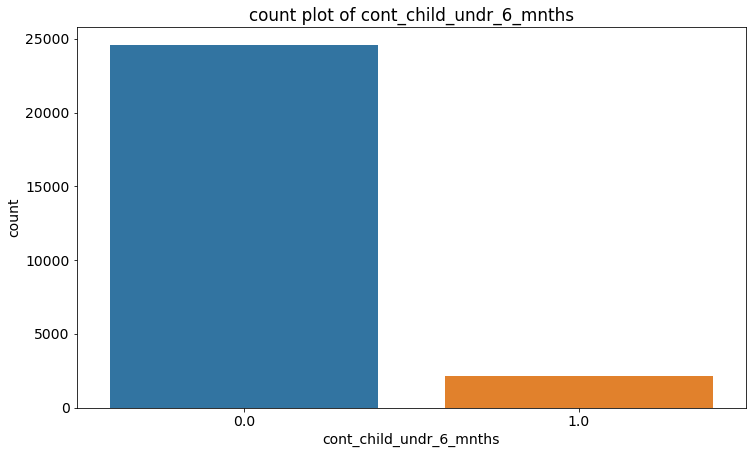

In [1116]:
sns.countplot(x = 'cont_child_undr_6_mnths', data = data)
plt.title('count plot of cont_child_undr_6_mnths')

In [1117]:
ct_ccu6m = pd.crosstab(data.cont_child_undr_6_mnths, data.h1n1_vaccine)
ct_ccu6m

h1n1_vaccine,0,1
cont_child_undr_6_mnths,,
0.0,19547,5022
1.0,1486,652


In [1118]:
chi2_contingency(ct_ccu6m, correction = False)

(118.85796008992361,
 1.1250395097834935e-27,
 1,
 array([[19349.22593328,  5219.77406672],
        [ 1683.77406672,   454.22593328]]))

Text(0.5, 1.0, 'cont_child_undr_6_mnths VS  h1n1_vaccine')

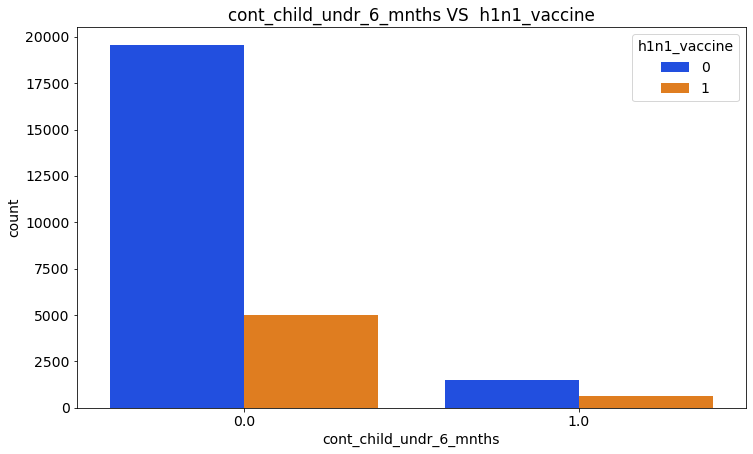

In [1119]:
sns.countplot(data.cont_child_undr_6_mnths, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('cont_child_undr_6_mnths VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 13) is_health_worker

In [1120]:
data.is_health_worker.isnull().sum()

804

In [1121]:
data.is_health_worker.value_counts()

0.0    23004
1.0     2899
Name: is_health_worker, dtype: int64

In [1122]:
data.is_health_worker.mode()

0    0.0
dtype: float64

In [1123]:
data.is_health_worker.fillna(0, inplace = True)

In [1124]:
data.is_health_worker.isnull().sum()

0

In [1125]:
data.is_health_worker.value_counts()

0.0    23808
1.0     2899
Name: is_health_worker, dtype: int64

Text(0.5, 1.0, 'count plot of is_health_worker')

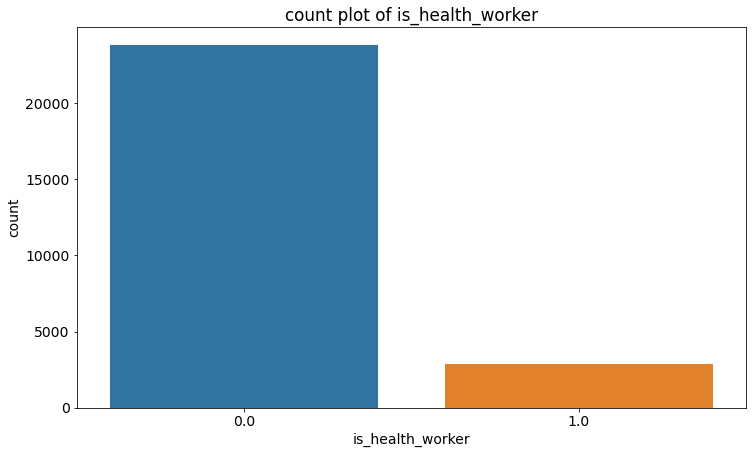

In [1126]:
sns.countplot(x = 'is_health_worker', data = data)
plt.title('count plot of is_health_worker')

In [1127]:
ct_ihw = pd.crosstab(data.is_health_worker, data.h1n1_vaccine)
ct_ihw

h1n1_vaccine,0,1
is_health_worker,,
0.0,19321,4487
1.0,1712,1187


In [1128]:
chi2_contingency(ct_ihw, correction = False)

(754.2809399216384,
 4.7051623310562056e-166,
 1,
 array([[18749.90317145,  5058.09682855],
        [ 2283.09682855,   615.90317145]]))

Text(0.5, 1.0, 'is_health_worker VS  h1n1_vaccine')

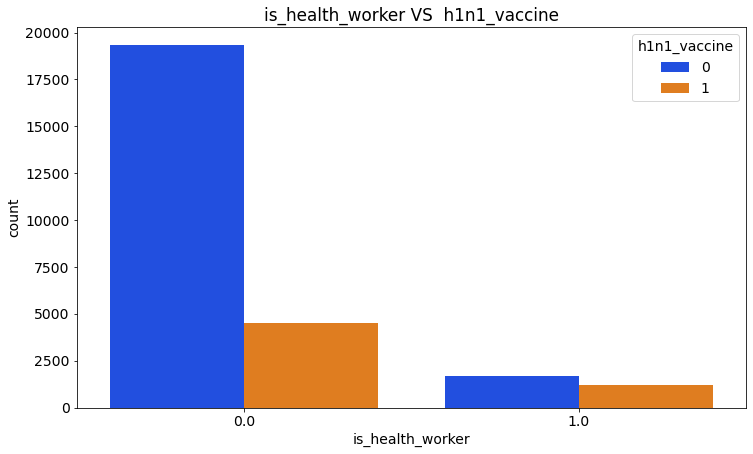

In [1129]:
sns.countplot(data.is_health_worker, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('is_health_worker VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 14) has_health_insur

In [1130]:
data.has_health_insur.isnull().sum()

12274

In [1131]:
data.has_health_insur.shape

(26707,)

**Here 48% Values of has_health_insur is null**
**so we can't consider this column in our model**

**NOT GOOD PREDICTOR**

# 

# 

# 15) is_h1n1_vacc_effective

In [1132]:
data.is_h1n1_vacc_effective.isnull().sum()

391

In [1133]:
data.is_h1n1_vacc_effective.value_counts()

4.0    11683
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [1134]:
data.is_h1n1_vacc_effective.median()

4.0

In [1135]:
data.is_h1n1_vacc_effective.fillna(4, inplace = True)

In [1136]:
data.is_h1n1_vacc_effective.isnull().sum()

0

In [1137]:
data.is_h1n1_vacc_effective.describe()

count    26707.000000
mean         3.852810
std          1.000195
min          1.000000
25%          3.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: is_h1n1_vacc_effective, dtype: float64

In [1138]:
data.is_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     1858
1.0      886
Name: is_h1n1_vacc_effective, dtype: int64

In [1139]:
data.is_h1n1_vacc_effective.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of is_h1n1_vacc_effective')

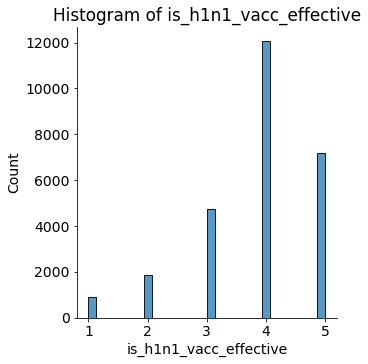

In [1140]:
sns.displot(data.is_h1n1_vacc_effective)
plt.title('Histogram of is_h1n1_vacc_effective')

Text(0.5, 1.0, 'distribution plot of is_h1n1_vacc_effective')

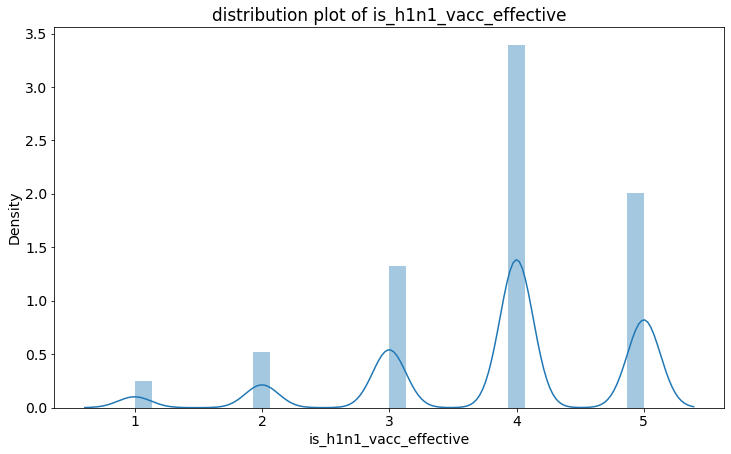

In [1141]:
sns.distplot(data.is_h1n1_vacc_effective)
plt.title('distribution plot of is_h1n1_vacc_effective')

Text(0.5, 1.0, 'count plot of is_h1n1_vacc_effective')

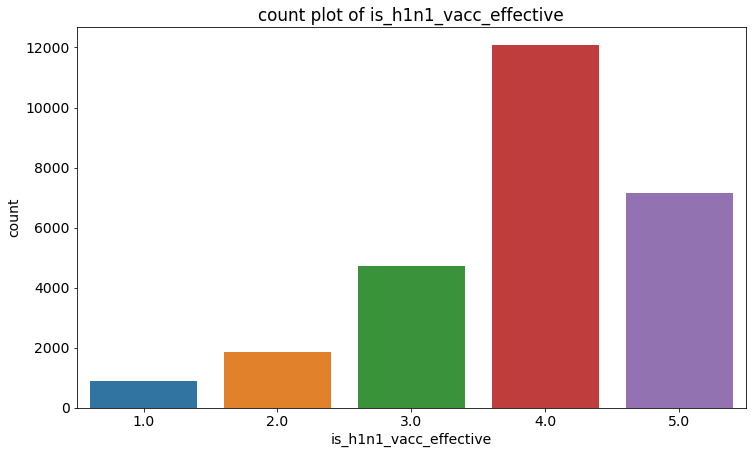

In [1142]:
sns.countplot(x = 'is_h1n1_vacc_effective', data = data)
plt.title('count plot of is_h1n1_vacc_effective')

Text(0.5, 1.0, 'BoxPlot Of is_h1n1_vacc_effective')

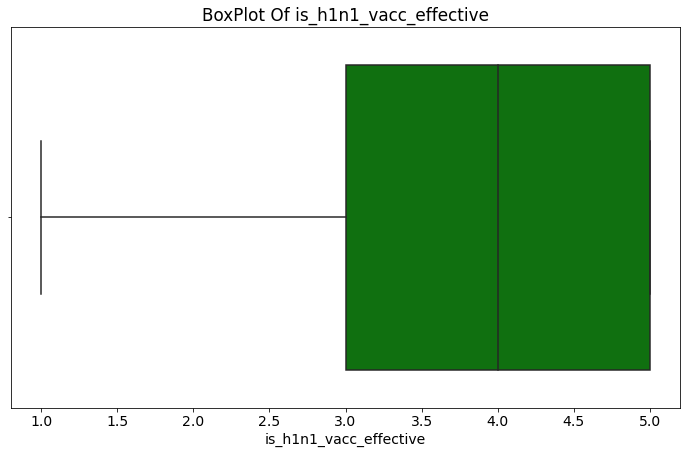

In [1143]:
sns.boxplot(data.is_h1n1_vacc_effective, color = 'g')
plt.title('BoxPlot Of is_h1n1_vacc_effective')

In [1144]:
data.groupby('is_h1n1_vacc_effective')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
is_h1n1_vacc_effective,,,,,,,,
1.0,886.0,0.047404,0.212622,0.0,0.0,0.0,0.0,1.0
2.0,1858.0,0.051130,0.220323,0.0,0.0,0.0,0.0,1.0
3.0,4723.0,0.105653,0.307426,0.0,0.0,0.0,0.0,1.0
4.0,12074.0,0.176992,0.381678,0.0,0.0,0.0,0.0,1.0
5.0,7166.0,0.404828,0.490893,0.0,0.0,0.0,1.0,1.0


In [1145]:
mod_hw = ols('h1n1_vaccine ~ is_h1n1_vacc_effective', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
is_h1n1_vacc_effective,1.0,319.397437,319.397437,2055.729036,0.0
Residual,26705.0,4149.140475,0.155369,NaN,NaN


In [1146]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.is_h1n1_vacc_effective, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   1.0    2.0   0.0037   0.9 -0.0397 0.0472  False
   1.0    3.0   0.0582 0.001  0.0193 0.0972   True
   1.0    4.0   0.1296 0.001  0.0926 0.1666   True
   1.0    5.0   0.3574 0.001  0.3195 0.3953   True
   2.0    3.0   0.0545 0.001  0.0254 0.0837   True
   2.0    4.0   0.1259 0.001  0.0993 0.1524   True
   2.0    5.0   0.3537 0.001   0.326 0.3814   True
   3.0    4.0   0.0713 0.001  0.0531 0.0896   True
   3.0    5.0   0.2992 0.001  0.2792 0.3191   True
   4.0    5.0   0.2278 0.001   0.212 0.2437   True
--------------------------------------------------


In [1147]:
data["is_h1n1_vacc_effective"].replace(1,2,inplace = True)

In [1148]:
data.is_h1n1_vacc_effective.value_counts()

4.0    12074
5.0     7166
3.0     4723
2.0     2744
Name: is_h1n1_vacc_effective, dtype: int64

In [1149]:
mod_hw = ols('h1n1_vaccine ~ is_h1n1_vacc_effective', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
is_h1n1_vacc_effective,1.0,341.959718,341.959718,2212.979823,0.0
Residual,26705.0,4126.578193,0.154525,NaN,NaN


In [1150]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.is_h1n1_vacc_effective, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   2.0    3.0   0.0557 0.001 0.0317 0.0798   True
   2.0    4.0   0.1271 0.001 0.1059 0.1483   True
   2.0    5.0   0.3549 0.001 0.3324 0.3774   True
   3.0    4.0   0.0713 0.001 0.0541 0.0885   True
   3.0    5.0   0.2992 0.001 0.2804  0.318   True
   4.0    5.0   0.2278 0.001 0.2129 0.2428   True
-------------------------------------------------


Text(0.5, 1.0, 'Count plot of is_h1n1_vacc_effective')

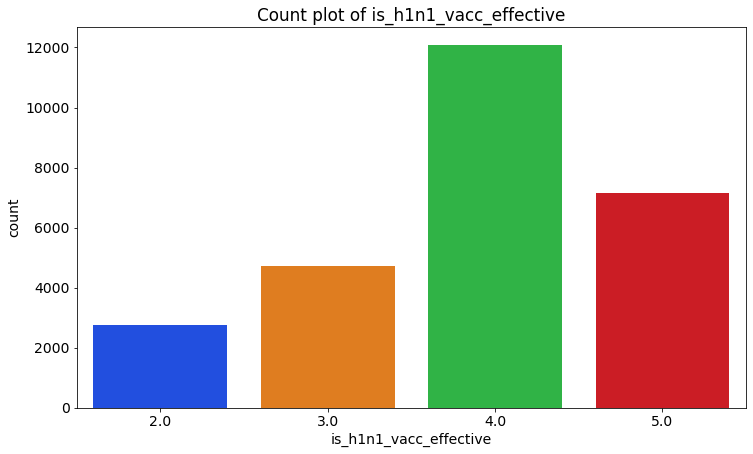

In [1151]:
sns.countplot(data.is_h1n1_vacc_effective, palette = 'bright')
plt.title('Count plot of is_h1n1_vacc_effective')

Text(0.5, 1.0, 'Boxplot Of is_h1n1_vacc_effective vs h1n1_vaccine')

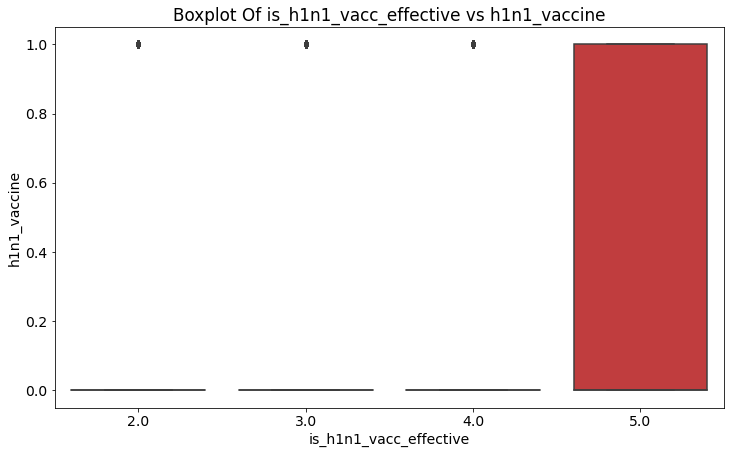

In [1152]:
sns.boxplot(x = 'is_h1n1_vacc_effective', y = 'h1n1_vaccine', data = data)
plt.title('Boxplot Of is_h1n1_vacc_effective vs h1n1_vaccine')

**Good Predictor**

# 

# 

# 16) is_h1n1_risky

In [1153]:
data.is_h1n1_risky.isnull().sum()

388

In [1154]:
data.is_h1n1_risky.value_counts()

2.0    9919
1.0    8139
4.0    5394
5.0    1750
3.0    1117
Name: is_h1n1_risky, dtype: int64

In [1155]:
data.is_h1n1_risky.median()

2.0

In [1156]:
data.is_h1n1_risky.fillna(2, inplace = True)

In [1157]:
data.is_h1n1_risky.isnull().sum()

0

In [1158]:
data.is_h1n1_risky.describe()

count    26707.000000
mean         2.337589
std          1.276825
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: is_h1n1_risky, dtype: float64

In [1159]:
data.is_h1n1_risky.value_counts()

2.0    10307
1.0     8139
4.0     5394
5.0     1750
3.0     1117
Name: is_h1n1_risky, dtype: int64

In [1160]:
data.is_h1n1_risky.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of is_h1n1_risky')

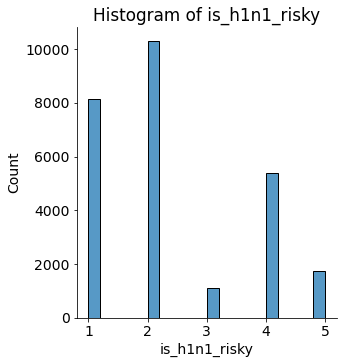

In [1161]:
sns.displot(data.is_h1n1_risky)
plt.title('Histogram of is_h1n1_risky')

Text(0.5, 1.0, 'distribution plot of is_h1n1_risky')

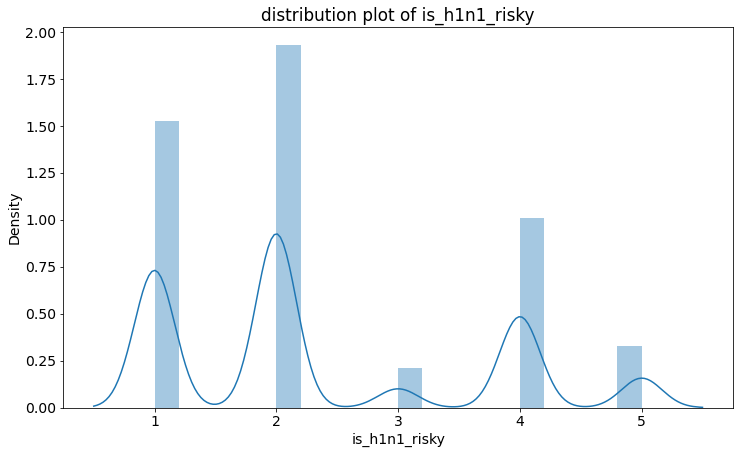

In [1162]:
sns.distplot(data.is_h1n1_risky)
plt.title('distribution plot of is_h1n1_risky')

Text(0.5, 1.0, 'count plot of is_h1n1_risky')

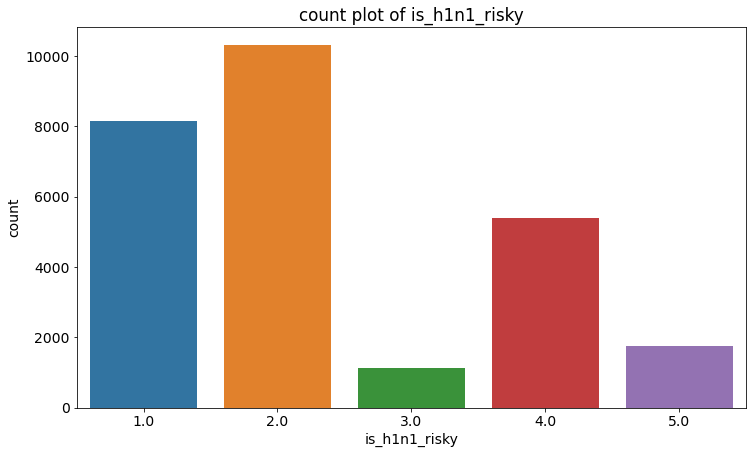

In [1163]:
sns.countplot(x = 'is_h1n1_risky', data = data)
plt.title('count plot of is_h1n1_risky')

Text(0.5, 1.0, 'BoxPlot Of is_h1n1_risky')

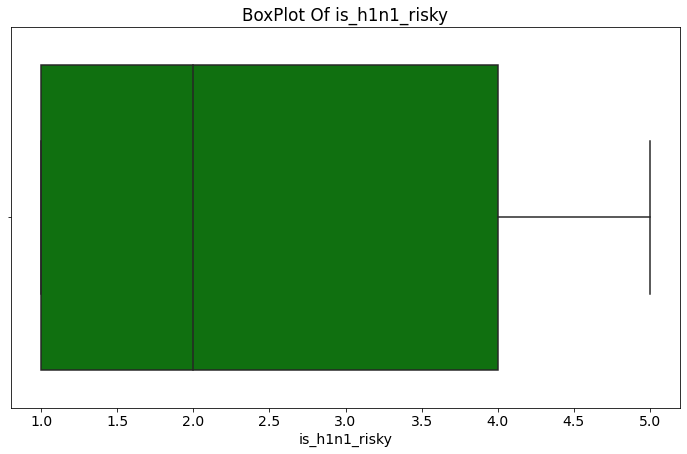

In [1164]:
sns.boxplot(data.is_h1n1_risky, color = 'g')
plt.title('BoxPlot Of is_h1n1_risky')

In [1165]:
data.groupby('is_h1n1_risky')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
is_h1n1_risky,,,,,,,,
1.0,8139.0,0.088340,0.283806,0.0,0.0,0.0,0.0,1.0
2.0,10307.0,0.169982,0.375635,0.0,0.0,0.0,0.0,1.0
3.0,1117.0,0.173679,0.379003,0.0,0.0,0.0,0.0,1.0
4.0,5394.0,0.392102,0.488265,0.0,0.0,0.0,1.0,1.0
5.0,1750.0,0.510857,0.500025,0.0,0.0,1.0,1.0,1.0


In [1166]:
mod_hw = ols('h1n1_vaccine ~ is_h1n1_risky', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
is_h1n1_risky,1.0,459.238737,459.238737,3058.881348,0.0
Residual,26705.0,4009.299175,0.150133,NaN,NaN


In [1167]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.is_h1n1_risky, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   1.0    2.0   0.0816 0.001   0.066 0.0973   True
   1.0    3.0   0.0853 0.001  0.0517  0.119   True
   1.0    4.0   0.3038 0.001  0.2852 0.3223   True
   1.0    5.0   0.4225 0.001  0.3947 0.4503   True
   2.0    3.0   0.0037   0.9 -0.0295 0.0369  False
   2.0    4.0   0.2221 0.001  0.2044 0.2398   True
   2.0    5.0   0.3409 0.001  0.3136 0.3681   True
   3.0    4.0   0.2184 0.001  0.1837 0.2531   True
   3.0    5.0   0.3372 0.001  0.2968 0.3776   True
   4.0    5.0   0.1188 0.001  0.0897 0.1478   True
--------------------------------------------------


In [1168]:
data["is_h1n1_risky"].replace(3,2,inplace = True)

In [1169]:
data.is_h1n1_risky.value_counts()

2.0    11424
1.0     8139
4.0     5394
5.0     1750
Name: is_h1n1_risky, dtype: int64

In [1170]:
mod_hw = ols('h1n1_vaccine ~ is_h1n1_risky', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
is_h1n1_risky,1.0,472.623852,472.623852,3158.58144,0.0
Residual,26705.0,3995.914059,0.149632,NaN,NaN


In [1171]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.is_h1n1_risky, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   1.0    2.0    0.082 0.001 0.0676 0.0964   True
   1.0    4.0   0.3038 0.001 0.2863 0.3212   True
   1.0    5.0   0.4225 0.001 0.3963 0.4487   True
   2.0    4.0   0.2218 0.001 0.2053 0.2382   True
   2.0    5.0   0.3405 0.001  0.315  0.366   True
   4.0    5.0   0.1188 0.001 0.0914 0.1461   True
-------------------------------------------------


Text(0.5, 1.0, 'count plot of is_h1n1_risky')

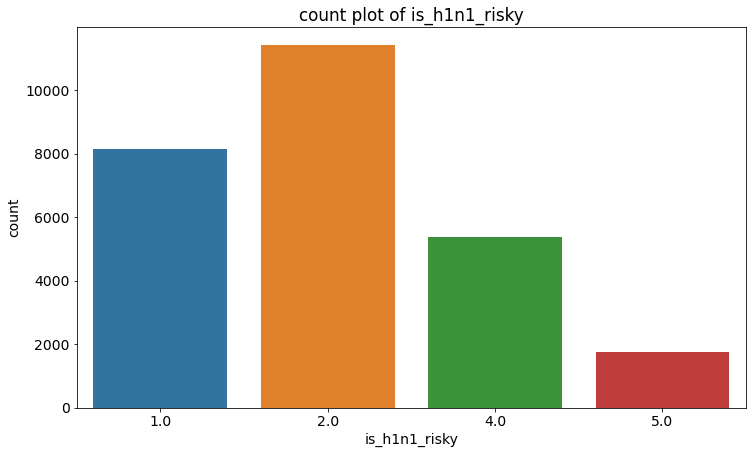

In [1172]:
sns.countplot(x = 'is_h1n1_risky', data = data)
plt.title('count plot of is_h1n1_risky')

Text(0.5, 1.0, 'Boxplot Of is_h1n1_risky vs h1n1_vaccine')

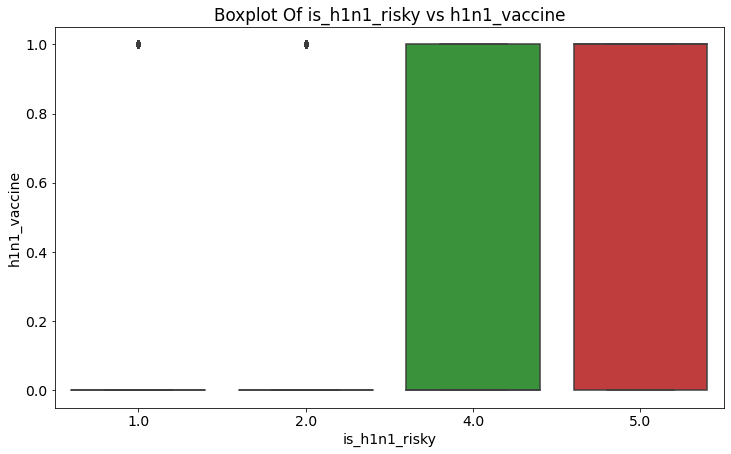

In [1173]:
sns.boxplot(x = 'is_h1n1_risky', y = 'h1n1_vaccine', data = data)
plt.title('Boxplot Of is_h1n1_risky vs h1n1_vaccine')

**Good Predictor**

# 

# 

# 17) sick_from_h1n1_vacc

In [1174]:
data.sick_from_h1n1_vacc.isnull().sum()

395

In [1175]:
data.sick_from_h1n1_vacc.value_counts()

2.0    9129
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [1176]:
data.sick_from_h1n1_vacc.median()

2.0

In [1177]:
data.sick_from_h1n1_vacc.fillna(2, inplace = True)

In [1178]:
data.sick_from_h1n1_vacc.isnull().sum()

0

In [1179]:
data.sick_from_h1n1_vacc.describe()

count    26707.000000
mean         2.352380
std          1.353339
min          1.000000
25%          1.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: sick_from_h1n1_vacc, dtype: float64

In [1180]:
data.sick_from_h1n1_vacc.value_counts()

2.0    9524
1.0    8998
4.0    5850
5.0    2187
3.0     148
Name: sick_from_h1n1_vacc, dtype: int64

In [1181]:
data.sick_from_h1n1_vacc.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of sick_from_h1n1_vacc')

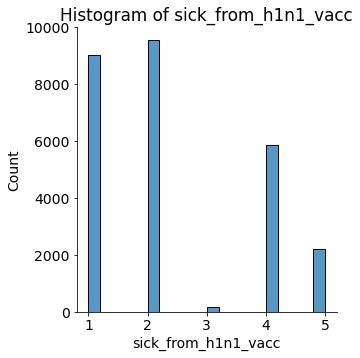

In [1182]:
sns.displot(data.sick_from_h1n1_vacc)
plt.title('Histogram of sick_from_h1n1_vacc')

Text(0.5, 1.0, 'distribution plot of sick_from_h1n1_vacc')

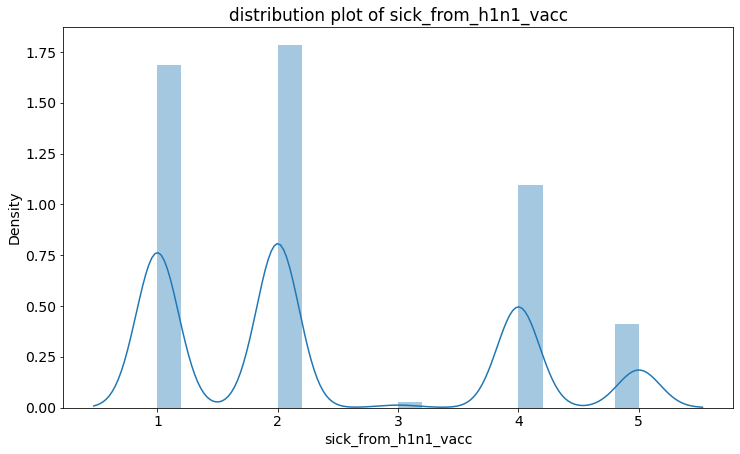

In [1183]:
sns.distplot(data.sick_from_h1n1_vacc)
plt.title('distribution plot of sick_from_h1n1_vacc')

Text(0.5, 1.0, 'count plot of sick_from_h1n1_vacc')

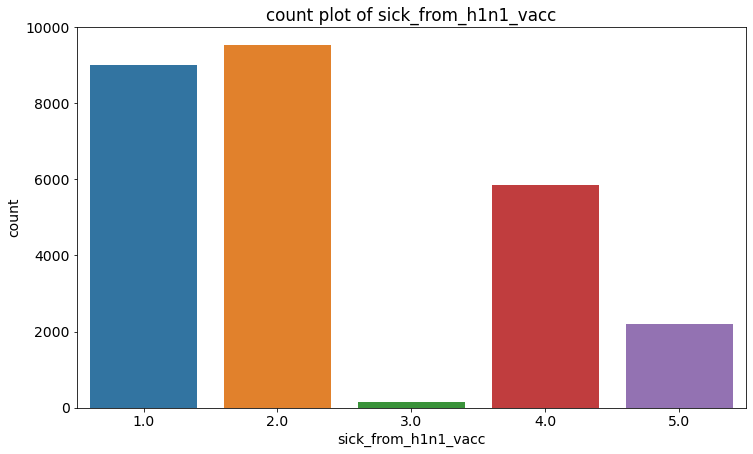

In [1184]:
sns.countplot(x = 'sick_from_h1n1_vacc', data = data)
plt.title('count plot of sick_from_h1n1_vacc')

Text(0.5, 1.0, 'BoxPlot Of sick_from_h1n1_vacc')

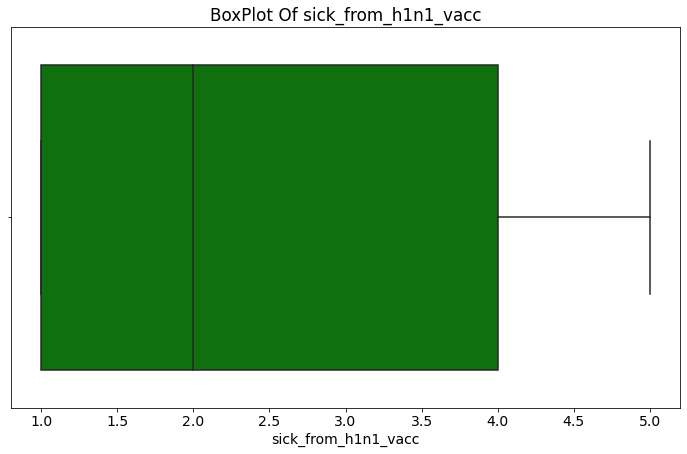

In [1185]:
sns.boxplot(data.sick_from_h1n1_vacc, color = 'g')
plt.title('BoxPlot Of sick_from_h1n1_vacc')

In [1186]:
data.groupby('sick_from_h1n1_vacc')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
sick_from_h1n1_vacc,,,,,,,,
1.0,8998.0,0.204601,0.403432,0.0,0.0,0.0,0.0,1.0
2.0,9524.0,0.174507,0.379564,0.0,0.0,0.0,0.0,1.0
3.0,148.0,0.081081,0.273886,0.0,0.0,0.0,0.0,1.0
4.0,5850.0,0.264274,0.440983,0.0,0.0,0.0,1.0,1.0
5.0,2187.0,0.280293,0.449245,0.0,0.0,0.0,1.0,1.0


In [1187]:
mod_hw = ols('sick_from_h1n1_vacc ~ h1n1_worry', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
h1n1_worry,1.0,6186.364968,6186.364968,3866.623682,0.0
Residual,26705.0,42726.391313,1.599940,NaN,NaN


In [1188]:
tukey_hw = pairwise_tukeyhsd(data.sick_from_h1n1_vacc, data.h1n1_worry, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   0.0    1.0   0.2668 0.001 0.1999 0.3336   True
   0.0    2.0   0.8301 0.001 0.7655 0.8947   True
   0.0    3.0   1.5254 0.001 1.4514 1.5994   True
   1.0    2.0   0.5633 0.001 0.5157  0.611   True
   1.0    3.0   1.2586 0.001 1.1988 1.3184   True
   2.0    3.0   0.6953 0.001 0.6381 0.7525   True
-------------------------------------------------


Text(0.5, 1.0, 'sick_from_h1n1_vacc VS  h1n1_vaccine')

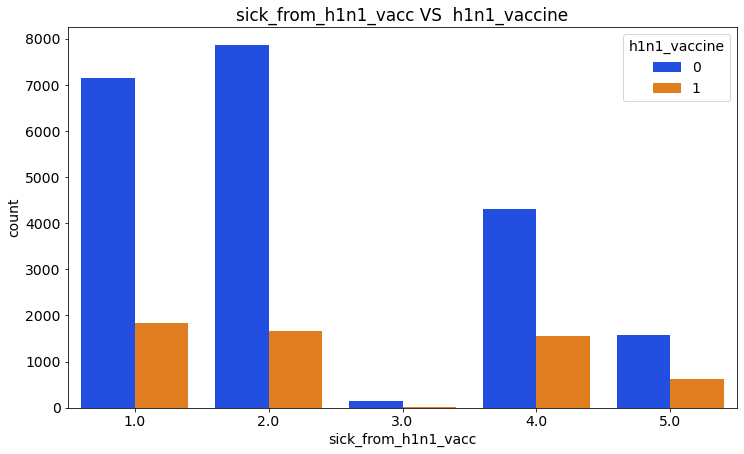

In [1189]:
sns.countplot(data.sick_from_h1n1_vacc, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('sick_from_h1n1_vacc VS  h1n1_vaccine')

Text(0.5, 1.0, 'Boxplot Of sick_from_h1n1_vacc vs h1n1_vaccine')

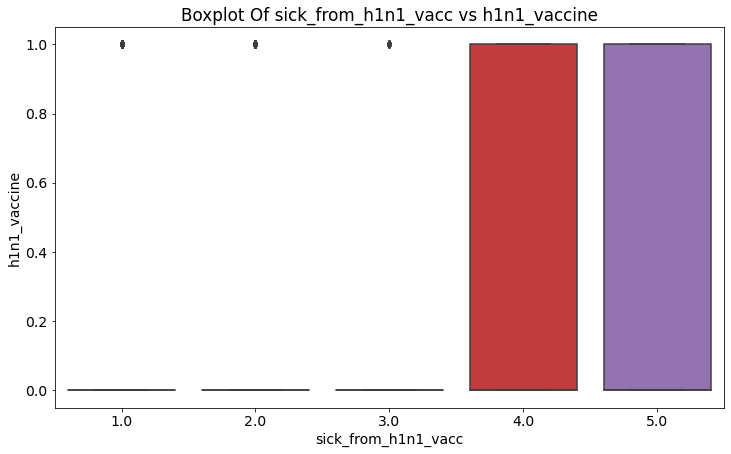

In [1190]:
sns.boxplot(x = 'sick_from_h1n1_vacc', y = 'h1n1_vaccine', data = data)
plt.title('Boxplot Of sick_from_h1n1_vacc vs h1n1_vaccine')

**Good Predictor**

# 

# 

# 18) is_seas_vacc_effective

In [1191]:
data.is_seas_vacc_effective.isnull().sum()

462

In [1192]:
data.is_seas_vacc_effective.value_counts()

4.0    11629
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [1193]:
data.is_seas_vacc_effective.median()

4.0

In [1194]:
data.is_seas_vacc_effective.fillna(4, inplace = True)

In [1195]:
data.is_seas_vacc_effective.isnull().sum()

0

In [1196]:
data.is_seas_vacc_effective.describe()

count    26707.000000
mean         4.025536
std          1.077131
min          1.000000
25%          4.000000
50%          4.000000
75%          5.000000
max          5.000000
Name: is_seas_vacc_effective, dtype: float64

In [1197]:
data.is_seas_vacc_effective.value_counts()

4.0    12091
5.0     9973
2.0     2206
1.0     1221
3.0     1216
Name: is_seas_vacc_effective, dtype: int64

In [1198]:
data.is_seas_vacc_effective.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of is_seas_vacc_effective')

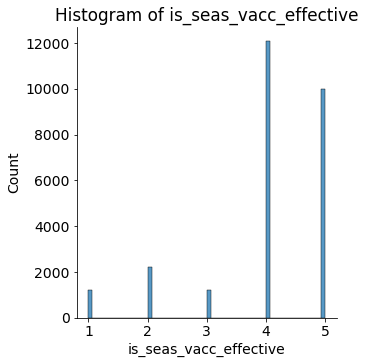

In [1199]:
sns.displot(data.is_seas_vacc_effective)
plt.title('Histogram of is_seas_vacc_effective')

Text(0.5, 1.0, 'distribution plot of is_seas_vacc_effective')

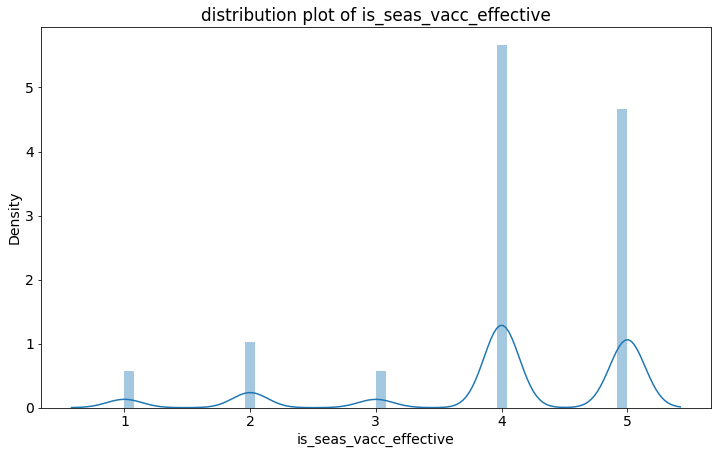

In [1200]:
sns.distplot(data.is_seas_vacc_effective)
plt.title('distribution plot of is_seas_vacc_effective')

Text(0.5, 1.0, 'count plot of is_seas_vacc_effective')

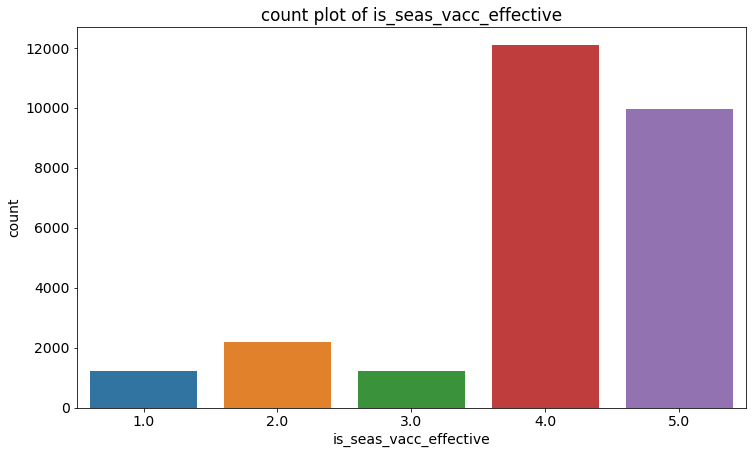

In [1201]:
sns.countplot(x = 'is_seas_vacc_effective', data = data)
plt.title('count plot of is_seas_vacc_effective')

Text(0.5, 1.0, 'BoxPlot Of is_seas_vacc_effective')

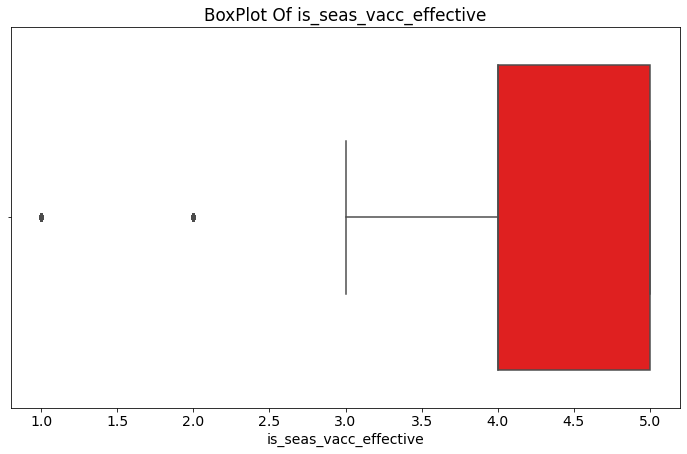

In [1202]:
sns.boxplot(data.is_seas_vacc_effective, color = 'r')
plt.title('BoxPlot Of is_seas_vacc_effective')

In [1203]:
IQR = data.is_seas_vacc_effective.quantile(.75) - data.is_seas_vacc_effective.quantile(.25)
IQR

1.0

In [1204]:
upper_limit = data.is_seas_vacc_effective.quantile(.75) + (1.5*IQR)
upper_limit

6.5

In [1205]:
lower_limit = data.is_seas_vacc_effective.quantile(.25) - (1.5*IQR)
lower_limit

2.5

In [1206]:
len(data.is_seas_vacc_effective[data.is_seas_vacc_effective < lower_limit])

3427

In [1207]:
data['is_seas_vacc_effective'] = np.where(data['is_seas_vacc_effective'] < lower_limit, 3, data['is_seas_vacc_effective'])

Text(0.5, 1.0, 'BoxPlot Of is_seas_vacc_effective')

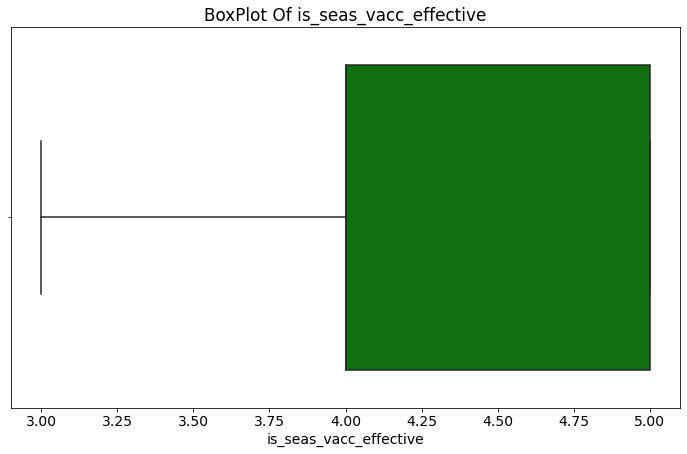

In [1208]:
sns.boxplot(data.is_seas_vacc_effective, color = 'g')
plt.title('BoxPlot Of is_seas_vacc_effective')

Text(0.5, 1.0, 'distribution plot of is_seas_vacc_effective')

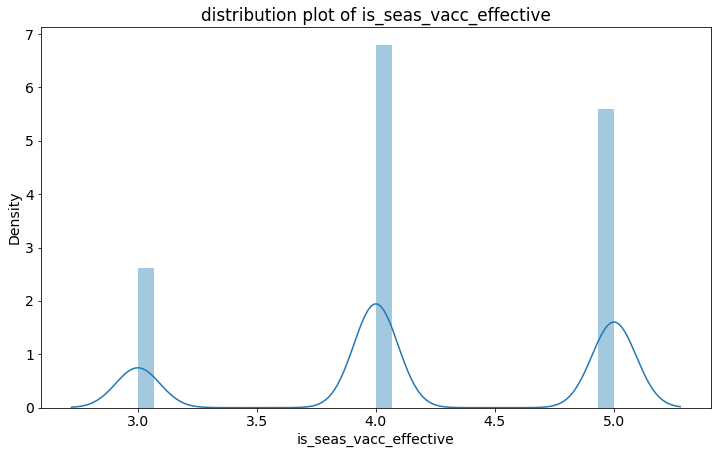

In [1209]:
sns.distplot(data.is_seas_vacc_effective)
plt.title('distribution plot of is_seas_vacc_effective')

In [1210]:
data.groupby('is_seas_vacc_effective')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
is_seas_vacc_effective,,,,,,,,
3.0,4643.0,0.098212,0.297634,0.0,0.0,0.0,0.0,1.0
4.0,12091.0,0.177157,0.381817,0.0,0.0,0.0,0.0,1.0
5.0,9973.0,0.308433,0.461869,0.0,0.0,0.0,1.0,1.0


In [1211]:
mod_hw = ols('h1n1_vaccine ~ is_seas_vacc_effective', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
is_seas_vacc_effective,1.0,163.295027,163.295027,1012.90306,3.360490e-218
Residual,26705.0,4305.242885,0.161215,NaN,NaN


In [1212]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.is_seas_vacc_effective, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   3.0    4.0   0.0789 0.001 0.0627 0.0952   True
   3.0    5.0   0.2102 0.001 0.1935 0.2269   True
   4.0    5.0   0.1313 0.001 0.1186  0.144   True
-------------------------------------------------


Text(0.5, 1.0, 'is_seas_vacc_effective VS  h1n1_vaccine')

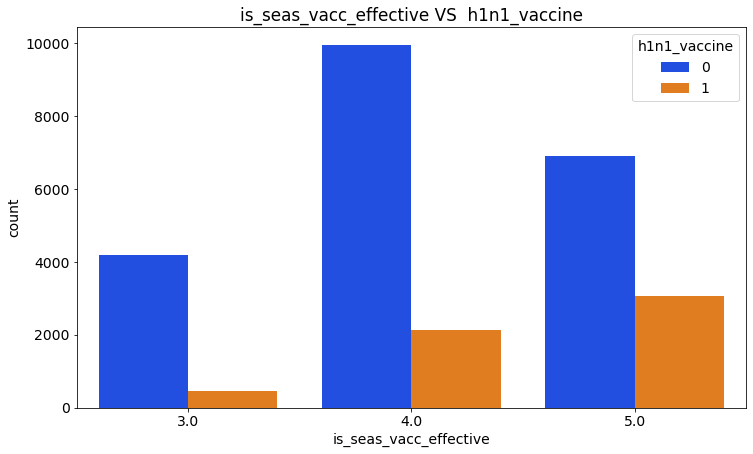

In [1213]:
sns.countplot(data.is_seas_vacc_effective, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('is_seas_vacc_effective VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 19) is_seas_risky

In [1214]:
data.is_seas_risky.isnull().sum()

514

In [1215]:
data.is_seas_risky.value_counts()

2.0    8954
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [1216]:
data.is_seas_risky.median()

2.0

In [1217]:
data.is_seas_risky.fillna(2, inplace = True)

In [1218]:
data.is_seas_risky.isnull().sum()

0

In [1219]:
data.is_seas_risky.describe()

count    26707.000000
mean         2.705321
std          1.375216
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max          5.000000
Name: is_seas_risky, dtype: float64

In [1220]:
data.is_seas_risky.value_counts()

2.0    9468
4.0    7630
1.0    5974
5.0    2958
3.0     677
Name: is_seas_risky, dtype: int64

In [1221]:
data.is_seas_risky.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of is_seas_risky')

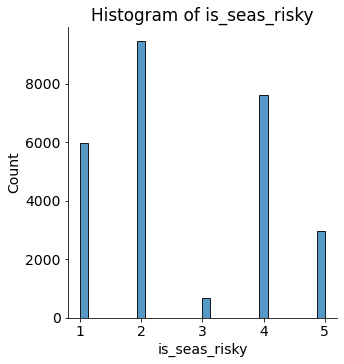

In [1222]:
sns.displot(data.is_seas_risky)
plt.title('Histogram of is_seas_risky')

Text(0.5, 1.0, 'distribution plot of is_seas_risky')

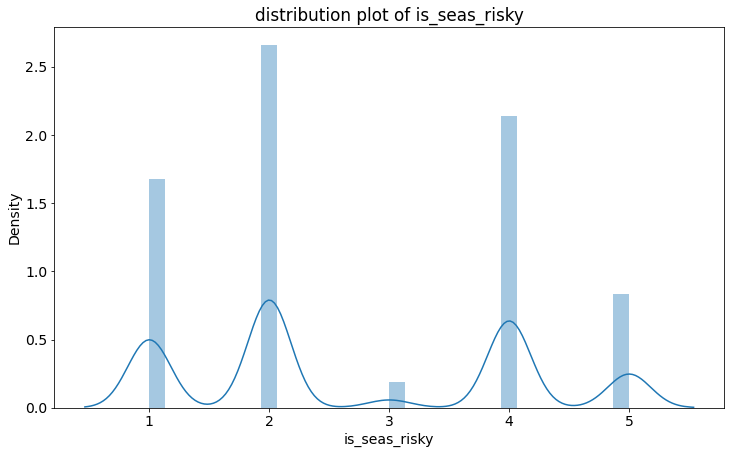

In [1223]:
sns.distplot(data.is_seas_risky)
plt.title('distribution plot of is_seas_risky')

Text(0.5, 1.0, 'count plot of is_seas_risky')

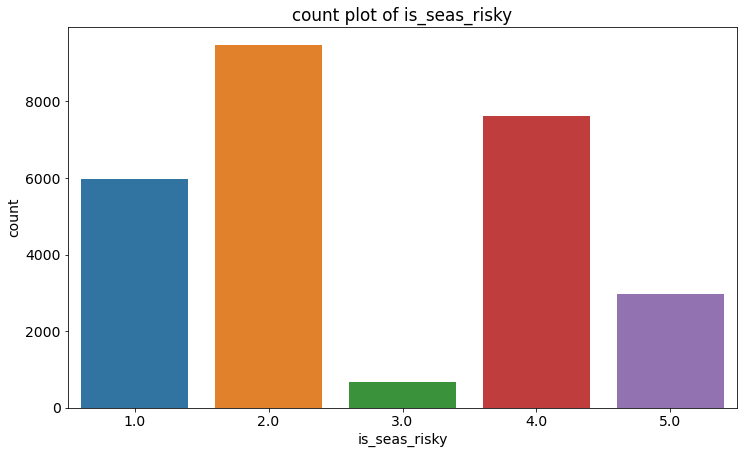

In [1224]:
sns.countplot(x = 'is_seas_risky', data = data)
plt.title('count plot of is_seas_risky')

Text(0.5, 1.0, 'BoxPlot Of is_seas_risky')

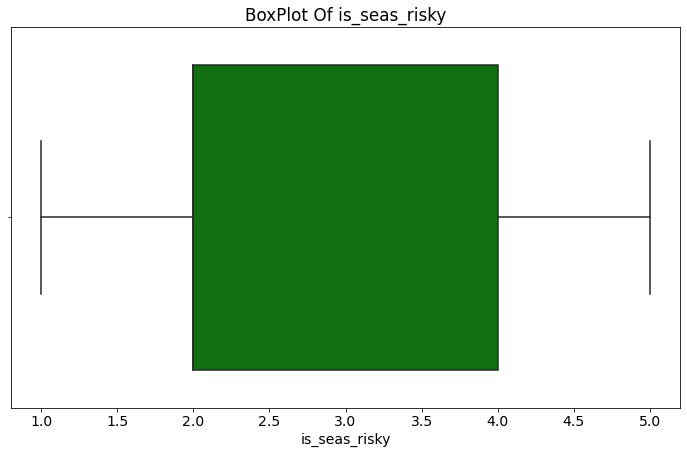

In [1225]:
sns.boxplot(data.is_seas_risky, color = 'g')
plt.title('BoxPlot Of is_seas_risky')

In [1226]:
data.groupby('is_seas_risky')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
is_seas_risky,,,,,,,,
1.0,5974.0,0.084700,0.278459,0.0,0.0,0.0,0.0,1.0
2.0,9468.0,0.160013,0.366637,0.0,0.0,0.0,0.0,1.0
3.0,677.0,0.200886,0.400959,0.0,0.0,0.0,0.0,1.0
4.0,7630.0,0.306029,0.460872,0.0,0.0,0.0,1.0,1.0
5.0,2958.0,0.399594,0.489898,0.0,0.0,0.0,1.0,1.0


In [1227]:
mod_hw = ols('h1n1_vaccine ~ is_seas_risky', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
is_seas_risky,1.0,292.562463,292.562463,1870.911522,0.0
Residual,26705.0,4175.975448,0.156374,NaN,NaN


In [1228]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.is_seas_risky, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj  lower  upper  reject
--------------------------------------------------
   1.0    2.0   0.0753  0.001 0.0575 0.0931   True
   1.0    3.0   0.1162  0.001 0.0724 0.1599   True
   1.0    4.0   0.2213  0.001 0.2027   0.24   True
   1.0    5.0   0.3149  0.001 0.2906 0.3391   True
   2.0    3.0   0.0409 0.0708 -0.002 0.0838  False
   2.0    4.0    0.146  0.001 0.1294 0.1626   True
   2.0    5.0   0.2396  0.001 0.2169 0.2623   True
   3.0    4.0   0.1051  0.001 0.0619 0.1484   True
   3.0    5.0   0.1987  0.001 0.1528 0.2447   True
   4.0    5.0   0.0936  0.001 0.0702 0.1169   True
--------------------------------------------------


In [1229]:
data["is_seas_risky"].replace(3,2,inplace = True)

In [1230]:
data.is_seas_risky.value_counts()

2.0    10145
4.0     7630
1.0     5974
5.0     2958
Name: is_seas_risky, dtype: int64

In [1231]:
mod_hw = ols('h1n1_vaccine ~ is_seas_risky', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
is_seas_risky,1.0,292.246404,292.246404,1868.748914,0.0
Residual,26705.0,4176.291507,0.156386,NaN,NaN


In [1232]:
tukey_hw = pairwise_tukeyhsd(data.h1n1_vaccine, data.is_seas_risky, alpha = 0.05)
print(tukey_hw)

Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj lower  upper  reject
-------------------------------------------------
   1.0    2.0    0.078 0.001 0.0615 0.0946   True
   1.0    4.0   0.2213 0.001 0.2038 0.2389   True
   1.0    5.0   0.3149 0.001 0.2921 0.3377   True
   2.0    4.0   0.1433 0.001 0.1279 0.1587   True
   2.0    5.0   0.2369 0.001 0.2156 0.2581   True
   4.0    5.0   0.0936 0.001 0.0716 0.1156   True
-------------------------------------------------


Text(0.5, 1.0, 'count plot of is_seas_risky')

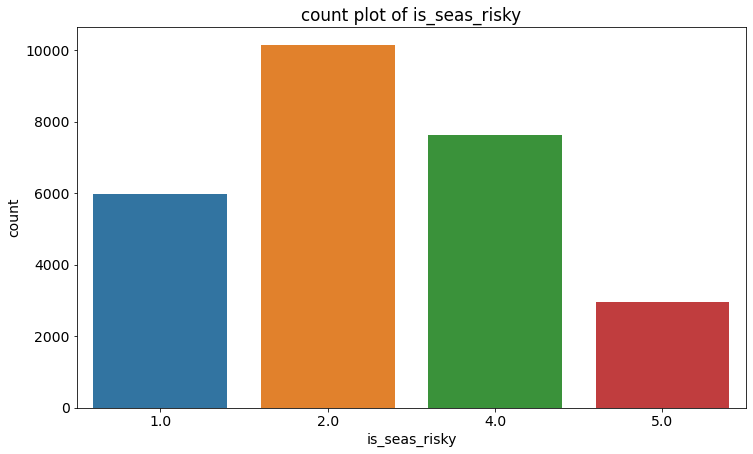

In [1233]:
sns.countplot(x = 'is_seas_risky', data = data)
plt.title('count plot of is_seas_risky')

Text(0.5, 1.0, 'Boxplot Of is_seas_risky vs h1n1_vaccine')

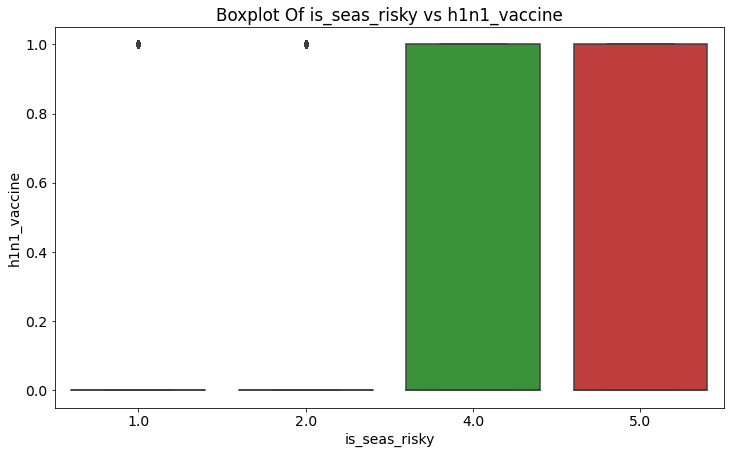

In [1234]:
sns.boxplot(x = 'is_seas_risky', y = 'h1n1_vaccine', data = data)
plt.title('Boxplot Of is_seas_risky vs h1n1_vaccine')

**Good Predictor**

# 

# 

# 20) sick_from_seas_vacc

In [1235]:
data.sick_from_seas_vacc.isnull().sum()

537

In [1236]:
data.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     7633
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [1237]:
data.sick_from_seas_vacc.median()

2.0

In [1238]:
data.sick_from_seas_vacc.fillna(2, inplace = True)

In [1239]:
data.sick_from_seas_vacc.isnull().sum()

0

In [1240]:
data.sick_from_seas_vacc.describe()

count    26707.000000
mean         2.115737
std          1.319585
min          1.000000
25%          1.000000
50%          2.000000
75%          2.000000
max          5.000000
Name: sick_from_seas_vacc, dtype: float64

In [1241]:
data.sick_from_seas_vacc.value_counts()

1.0    11870
2.0     8170
4.0     4852
5.0     1721
3.0       94
Name: sick_from_seas_vacc, dtype: int64

In [1242]:
data.sick_from_seas_vacc.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of sick_from_seas_vacc')

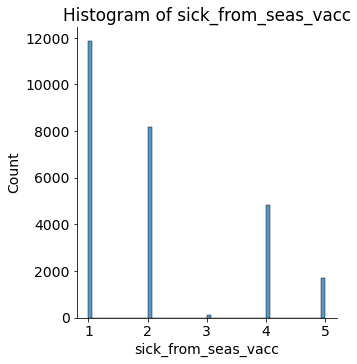

In [1243]:
sns.displot(data.sick_from_seas_vacc)
plt.title('Histogram of sick_from_seas_vacc')

Text(0.5, 1.0, 'distribution plot of sick_from_seas_vacc')

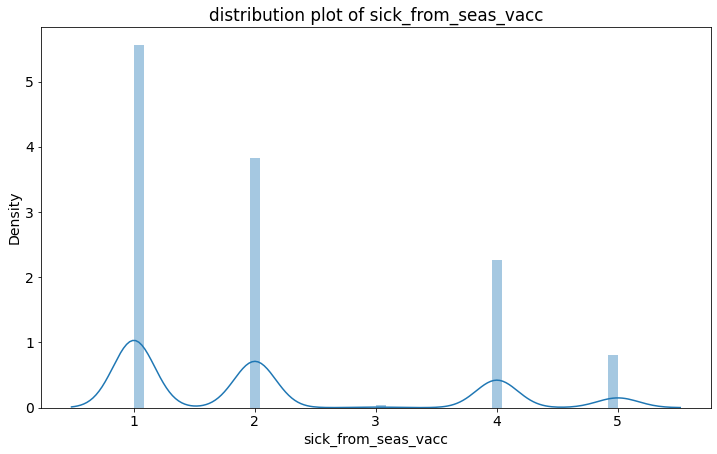

In [1244]:
sns.distplot(data.sick_from_seas_vacc)
plt.title('distribution plot of sick_from_seas_vacc')

Text(0.5, 1.0, 'count plot of sick_from_seas_vacc')

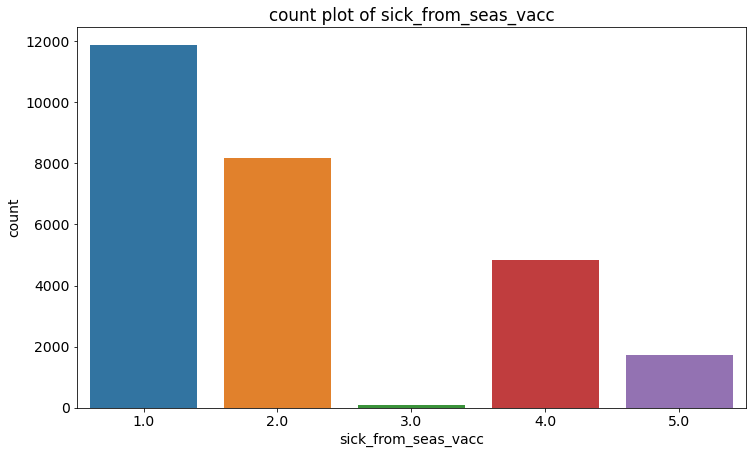

In [1245]:
sns.countplot(x = 'sick_from_seas_vacc', data = data)
plt.title('count plot of sick_from_seas_vacc')

Text(0.5, 1.0, 'BoxPlot Of sick_from_seas_vacc')

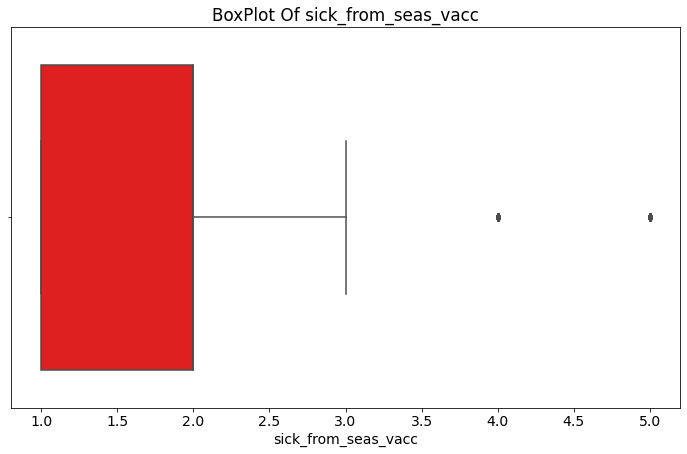

In [1246]:
sns.boxplot(data.sick_from_seas_vacc, color = 'r')
plt.title('BoxPlot Of sick_from_seas_vacc')

In [1247]:
IQR = data.sick_from_seas_vacc.quantile(.75) - data.sick_from_seas_vacc.quantile(.25)
IQR

1.0

In [1248]:
upper_limit = data.sick_from_seas_vacc.quantile(.75) + (1.5*IQR)
upper_limit

3.5

In [1249]:
len(data.sick_from_seas_vacc[data.sick_from_seas_vacc > upper_limit])

6573

In [1250]:
data['sick_from_seas_vacc'] = np.where(data['sick_from_seas_vacc'] > upper_limit, 3, data['sick_from_seas_vacc'])

Text(0.5, 1.0, 'BoxPlot Of sick_from_seas_vacc')

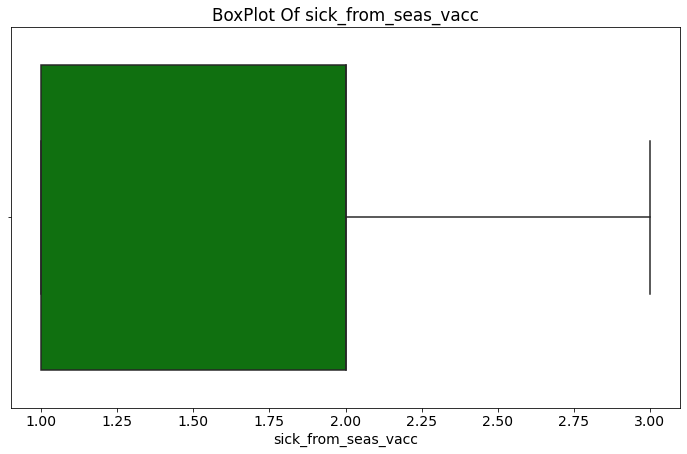

In [1251]:
sns.boxplot(data.sick_from_seas_vacc, color = 'g')
plt.title('BoxPlot Of sick_from_seas_vacc')

Text(0.5, 1.0, 'distribution plot of sick_from_seas_vacc')

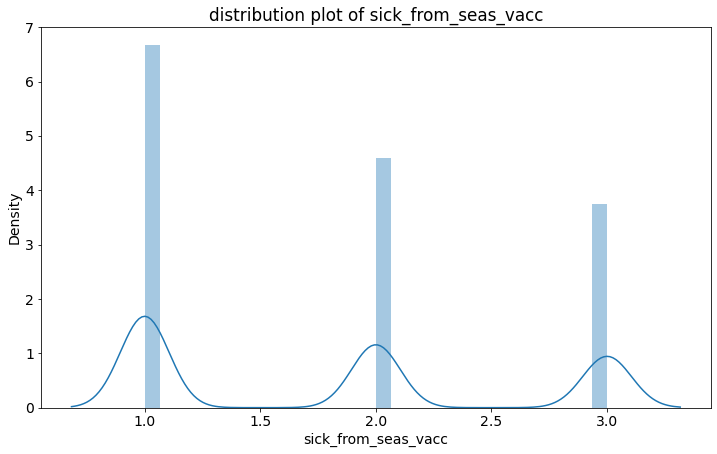

In [1252]:
sns.distplot(data.sick_from_seas_vacc)
plt.title('distribution plot of sick_from_seas_vacc')

In [1253]:
data.groupby('sick_from_seas_vacc')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
sick_from_seas_vacc,,,,,,,,
1.0,11870.0,0.220556,0.414639,0.0,0.0,0.0,0.0,1.0
2.0,8170.0,0.189474,0.391908,0.0,0.0,0.0,0.0,1.0
3.0,6667.0,0.226189,0.418394,0.0,0.0,0.0,0.0,1.0


In [1254]:
mod_hw = ols('h1n1_vaccine ~ sick_from_seas_vacc', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
sick_from_seas_vacc,1.0,0.001209,0.001209,0.007228,0.932249
Residual,26705.0,4468.536702,0.167330,NaN,NaN


**Not a Good Predictor**

# 

# 

# 21) age_bracket

In [1255]:
data.age_bracket.isnull().sum()

0

In [1256]:
data.age_bracket.value_counts()

65+ Years        6843
55 - 64 Years    5563
45 - 54 Years    5238
18 - 34 Years    5215
35 - 44 Years    3848
Name: age_bracket, dtype: int64

Text(0.5, 1.0, 'count plot of age_bracket')

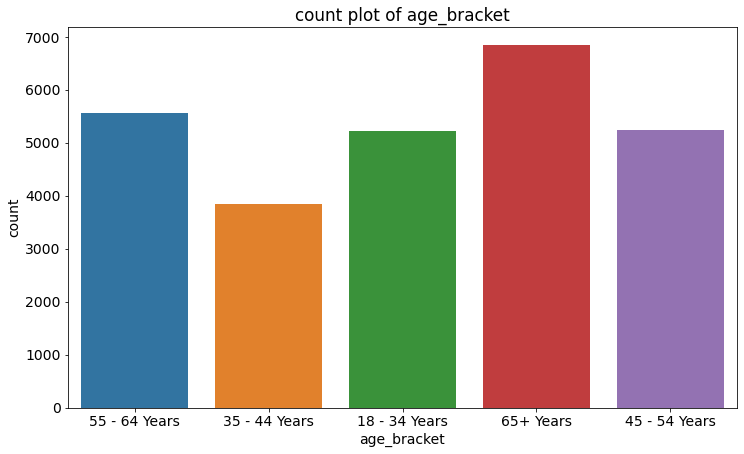

In [1257]:
sns.countplot(x = 'age_bracket', data = data)
plt.title('count plot of age_bracket')

In [1258]:
ct_ab = pd.crosstab(data.age_bracket, data.h1n1_vaccine)
ct_ab

h1n1_vaccine,0,1
age_bracket,,
18 - 34 Years,4224,991
35 - 44 Years,3087,761
45 - 54 Years,4218,1020
55 - 64 Years,4212,1351
65+ Years,5292,1551


In [1259]:
chi2_contingency(ct_ab, correction = False)

(69.44576247937547,
 2.9716028185463074e-14,
 4,
 array([[4107.05414311, 1107.94585689],
        [3030.47830157,  817.52169843],
        [4125.16770884, 1112.83229116],
        [4381.12026809, 1181.87973191],
        [5389.17957839, 1453.82042161]]))

Text(0.5, 1.0, 'age_bracket VS  h1n1_vaccine')

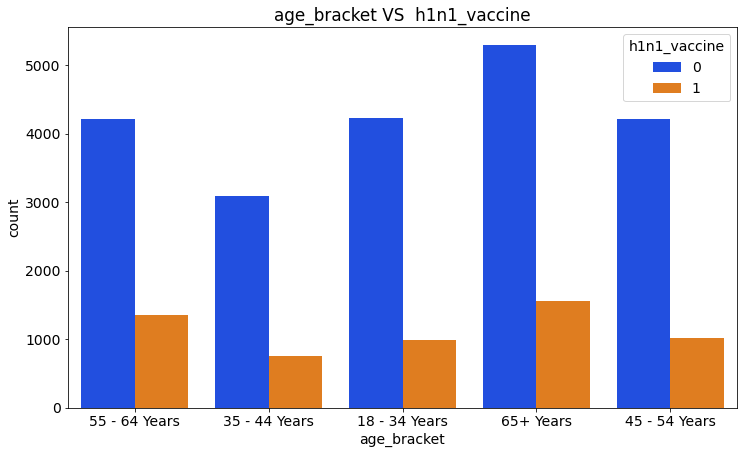

In [1260]:
sns.countplot(data.age_bracket, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('age_bracket VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 22) qualification

In [1261]:
data.qualification.isnull().sum()

1407

In [1262]:
data.qualification.value_counts()

College Graduate    10097
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

In [1263]:
data.qualification.mode()

0    College Graduate
dtype: object

In [1264]:
data.qualification.fillna('College Graduate', inplace = True)

In [1265]:
data.qualification.isnull().sum()

0

In [1266]:
data.qualification.value_counts()

College Graduate    11504
Some College         7043
12 Years             5797
< 12 Years           2363
Name: qualification, dtype: int64

Text(0.5, 1.0, 'count plot of qualification')

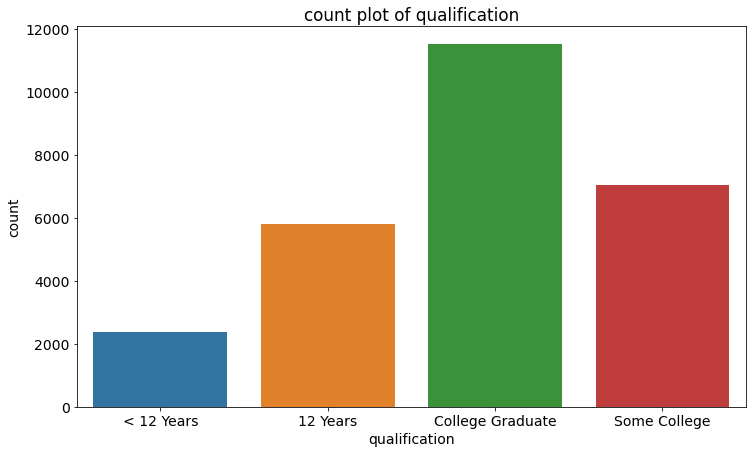

In [1267]:
sns.countplot(x = 'qualification', data = data)
plt.title('count plot of qualification')

In [1268]:
ct_q = pd.crosstab(data.qualification, data.h1n1_vaccine)
ct_q

h1n1_vaccine,0,1
qualification,,
12 Years,4726,1071
< 12 Years,1968,395
College Graduate,8760,2744
Some College,5579,1464


In [1269]:
chi2_contingency(ct_q, correction = False)

(103.18537711307252,
 3.209804092590849e-22,
 3,
 array([[4565.40611076, 1231.59388924],
        [1860.97199236,  502.02800764],
        [9059.93305126, 2444.06694874],
        [5546.68884562, 1496.31115438]]))

Text(0.5, 1.0, 'qualification VS  h1n1_vaccine')

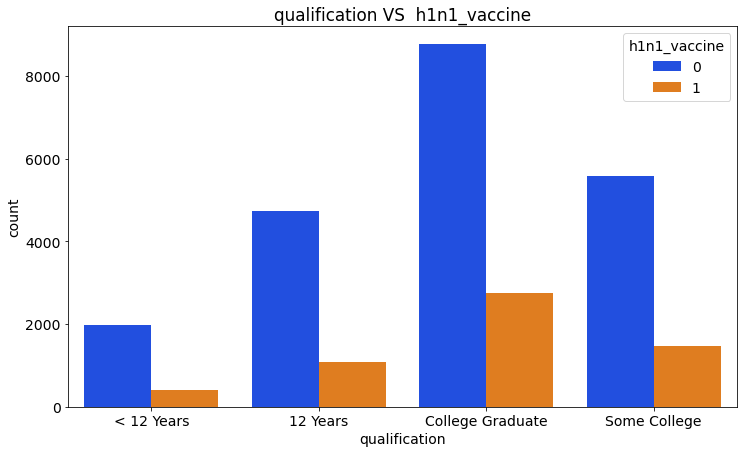

In [1270]:
sns.countplot(data.qualification, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('qualification VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 23) race

In [1271]:
data.race.isnull().sum()

0

In [1272]:
data.race.value_counts()

White                21222
Black                 2118
Hispanic              1755
Other or Multiple     1612
Name: race, dtype: int64

Text(0.5, 1.0, 'count plot of race')

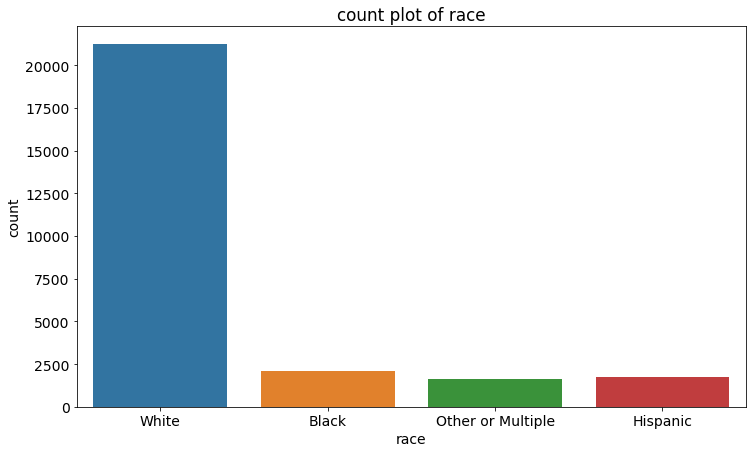

In [1273]:
sns.countplot(x = 'race', data = data)
plt.title('count plot of race')

In [1274]:
ct_r = pd.crosstab(data.race, data.h1n1_vaccine)
ct_r

h1n1_vaccine,0,1
race,,
Black,1803,315
Hispanic,1390,365
Other or Multiple,1263,349
White,16577,4645


In [1275]:
chi2_contingency(ct_r, correction = False)

(57.01119582422927,
 2.5557770361705444e-12,
 3,
 array([[ 1668.02314   ,   449.97686   ],
        [ 1382.14381997,   372.85618003],
        [ 1269.5246939 ,   342.4753061 ],
        [16713.30834613,  4508.69165387]]))

Text(0.5, 1.0, 'race VS  h1n1_vaccine')

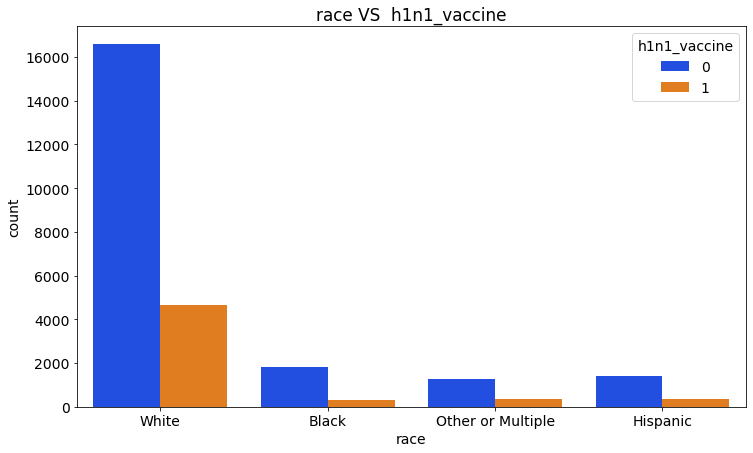

In [1276]:
sns.countplot(data.race, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('race VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 24) sex

In [1277]:
data.sex.isnull().sum()

0

In [1278]:
data.sex.value_counts()

Female    15858
Male      10849
Name: sex, dtype: int64

Text(0.5, 1.0, 'count plot of sex')

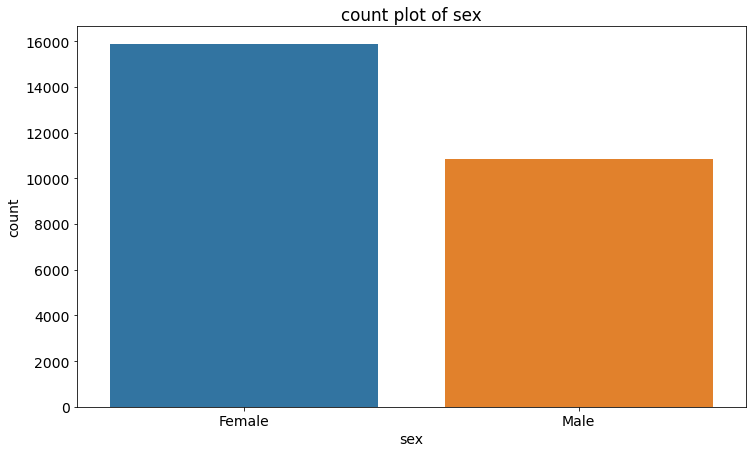

In [1279]:
sns.countplot(x = 'sex', data = data)
plt.title('count plot of sex')

In [1280]:
ct_sex = pd.crosstab(data.sex, data.h1n1_vaccine)
ct_sex

h1n1_vaccine,0,1
sex,,
Female,12378,3480
Male,8655,2194


In [1281]:
chi2_contingency(ct_sex, correction = False)

(11.412649487692018,
 0.0007294572775631631,
 1,
 array([[12488.90979893,  3369.09020107],
        [ 8544.09020107,  2304.90979893]]))

Text(0.5, 1.0, 'sex VS  h1n1_vaccine')

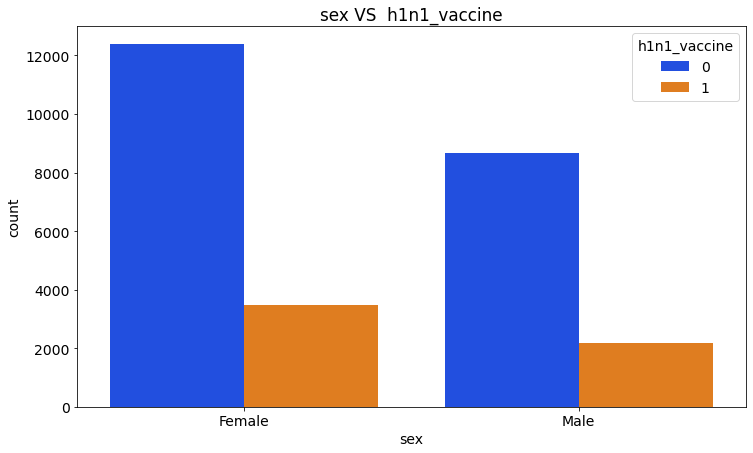

In [1282]:
sns.countplot(data.sex, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('sex VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 25) income_level

In [1283]:
data.income_level.isnull().sum()

4423

In [1284]:
data.income_level.value_counts()

<= $75,000, Above Poverty    12777
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

In [1285]:
data.income_level.mode()

0    <= $75,000, Above Poverty
dtype: object

In [1286]:
data.income_level.fillna('<= $75,000, Above Poverty', inplace = True)

In [1287]:
data.income_level.isnull().sum()

0

In [1288]:
data.income_level.value_counts()

<= $75,000, Above Poverty    17200
> $75,000                     6810
Below Poverty                 2697
Name: income_level, dtype: int64

Text(0.5, 1.0, 'count plot of income_level')

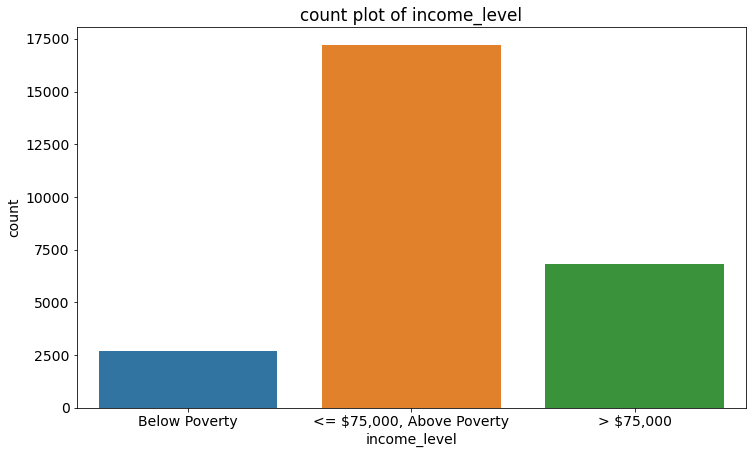

In [1289]:
sns.countplot(x = 'income_level', data = data)
plt.title('count plot of income_level')

In [1290]:
ct_il = pd.crosstab(data.income_level, data.h1n1_vaccine)
ct_il

h1n1_vaccine,0,1
income_level,,
"<= $75,000, Above Poverty",13765,3435
"> $75,000",5087,1723
Below Poverty,2181,516


In [1291]:
chi2_contingency(ct_il, correction = False)

(90.84009217768136,
 1.880722047715149e-20,
 2,
 array([[13545.79698206,  3654.20301794],
        [ 5363.19054929,  1446.80945071],
        [ 2124.01246864,   572.98753136]]))

Text(0.5, 1.0, 'income_level VS  h1n1_vaccine')

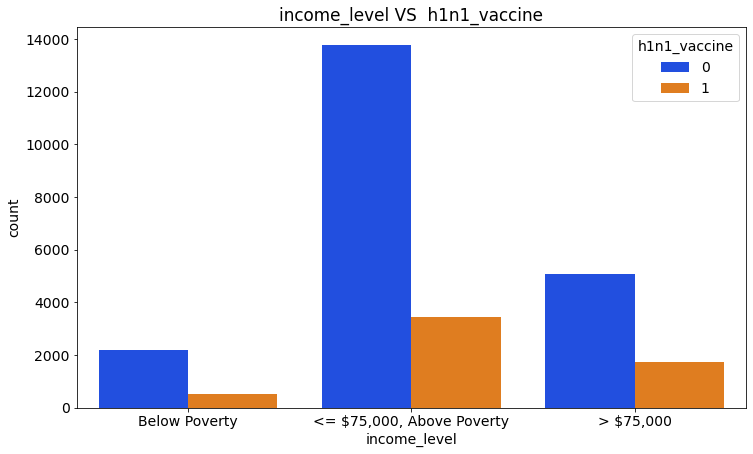

In [1292]:
sns.countplot(data.income_level, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('income_level VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 26) marital_status

In [1293]:
data.marital_status.isnull().sum()

1408

In [1294]:
data.marital_status.value_counts()

Married        13555
Not Married    11744
Name: marital_status, dtype: int64

In [1295]:
data.marital_status.mode()

0    Married
dtype: object

In [1296]:
data.marital_status.fillna('Married', inplace = True)

In [1297]:
data.marital_status.isnull().sum()

0

In [1298]:
data.marital_status.value_counts()

Married        14963
Not Married    11744
Name: marital_status, dtype: int64

Text(0.5, 1.0, 'count plot of marital_status')

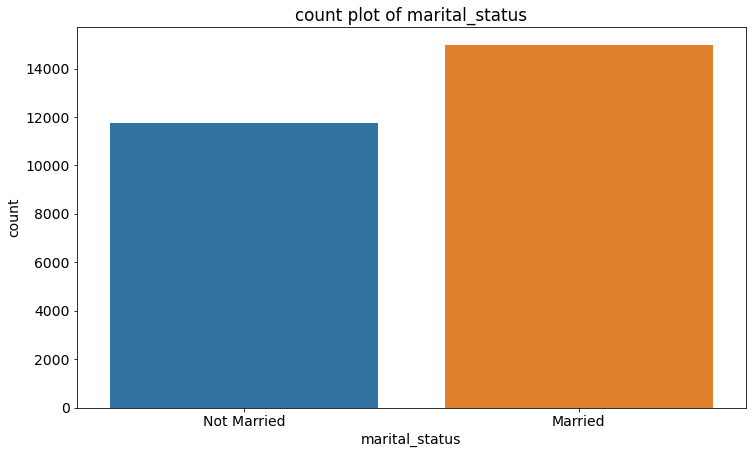

In [1299]:
sns.countplot(x = 'marital_status', data = data)
plt.title('count plot of marital_status')

In [1300]:
ct_ms = pd.crosstab(data.marital_status, data.h1n1_vaccine)
ct_ms

h1n1_vaccine,0,1
marital_status,,
Married,11539,3424
Not Married,9494,2250


In [1301]:
chi2_contingency(ct_ms, correction = False)

(54.548161631248846,
 1.516844786399669e-13,
 1,
 array([[11784.05582806,  3178.94417194],
        [ 9248.94417194,  2495.05582806]]))

Text(0.5, 1.0, 'marital_status VS  h1n1_vaccine')

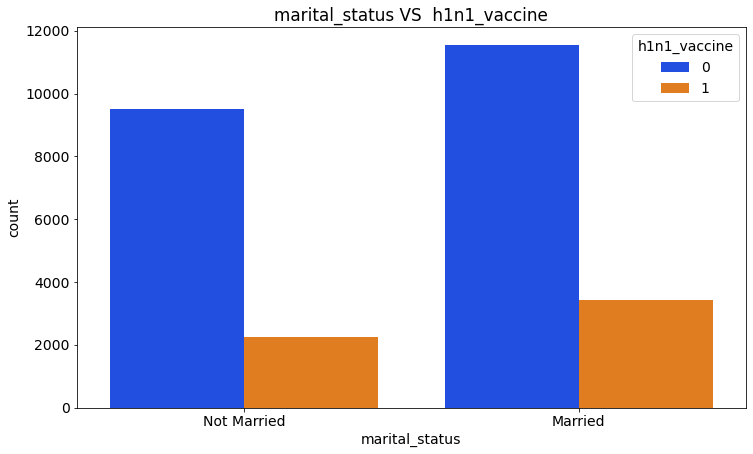

In [1302]:
sns.countplot(data.marital_status, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('marital_status VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 27) housing_status

In [1303]:
data.housing_status.isnull().sum()

2042

In [1304]:
data.housing_status.value_counts()

Own     18736
Rent     5929
Name: housing_status, dtype: int64

In [1305]:
data.housing_status.mode()

0    Own
dtype: object

In [1306]:
data.housing_status.fillna('Own', inplace = True)

In [1307]:
data.housing_status.isnull().sum()

0

In [1308]:
data.housing_status.value_counts()

Own     20778
Rent     5929
Name: housing_status, dtype: int64

Text(0.5, 1.0, 'count plot of housing_status')

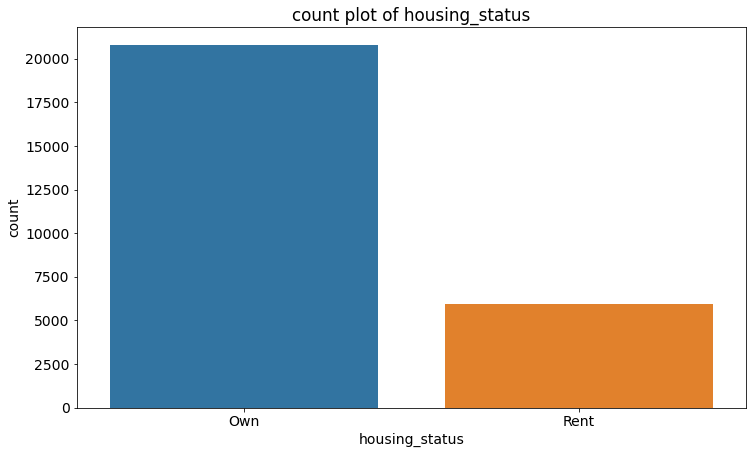

In [1309]:
sns.countplot(x = 'housing_status', data = data)
plt.title('count plot of housing_status')

In [1310]:
ct_hs = pd.crosstab(data.housing_status, data.h1n1_vaccine)
ct_hs

h1n1_vaccine,0,1
housing_status,,
Own,16223,4555
Rent,4810,1119


In [1311]:
chi2_contingency(ct_hs, correction = False)

(25.627340211011663,
 4.1413001799506495e-07,
 1,
 array([[16363.63777287,  4414.36222713],
        [ 4669.36222713,  1259.63777287]]))

Text(0.5, 1.0, 'housing_status VS  h1n1_vaccine')

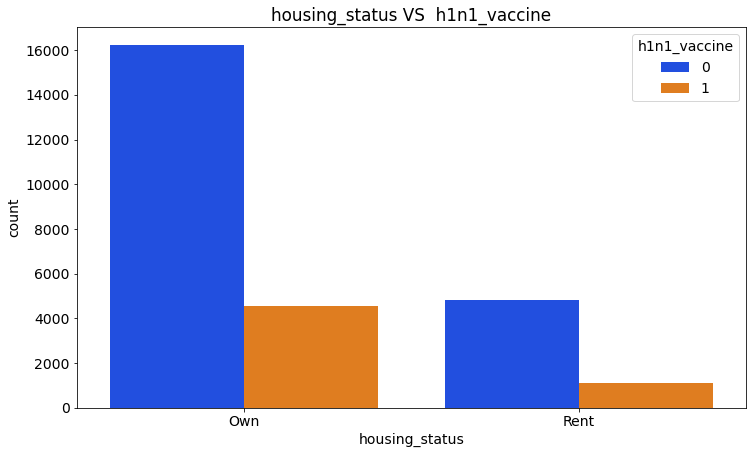

In [1312]:
sns.countplot(data.housing_status, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('housing_status VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 28) employment

In [1313]:
data.employment.isnull().sum()

1463

In [1314]:
data.employment.value_counts()

Employed              13560
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64

In [1315]:
data.employment.mode()

0    Employed
dtype: object

In [1316]:
data.employment.fillna('Employed', inplace = True)

In [1317]:
data.employment.isnull().sum()

0

In [1318]:
data.employment.value_counts()

Employed              15023
Not in Labor Force    10231
Unemployed             1453
Name: employment, dtype: int64

Text(0.5, 1.0, 'count plot of employment')

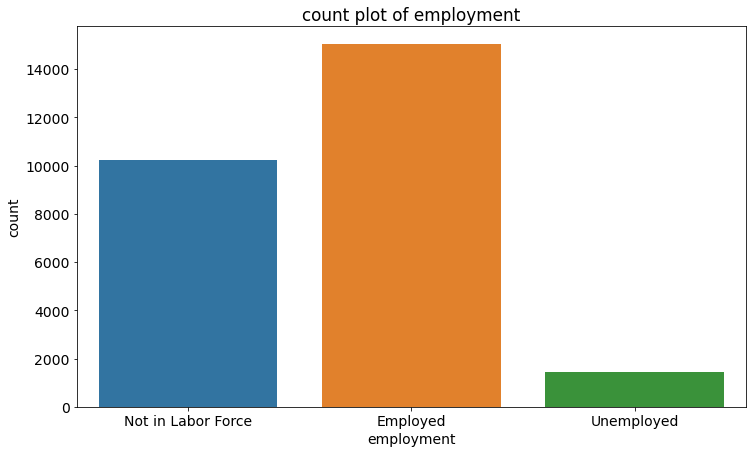

In [1319]:
sns.countplot(x = 'employment', data = data)
plt.title('count plot of employment')

In [1320]:
ct_e = pd.crosstab(data.employment, data.h1n1_vaccine)
ct_e

h1n1_vaccine,0,1
employment,,
Employed,11829,3194
Not in Labor Force,7988,2243
Unemployed,1216,237


In [1321]:
chi2_contingency(ct_e, correction = False)

(23.957973424416053,
 6.274688521364308e-06,
 2,
 array([[11831.30860823,  3191.69139177],
        [ 8057.38656532,  2173.61343468],
        [ 1144.30482645,   308.69517355]]))

Text(0.5, 1.0, 'employment VS  h1n1_vaccine')

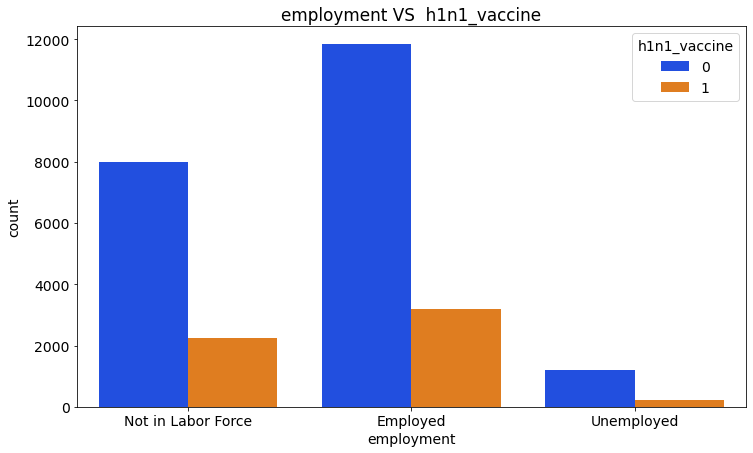

In [1322]:
sns.countplot(data.employment, hue = data.h1n1_vaccine, palette = 'bright')
plt.title('employment VS  h1n1_vaccine')

**Good Predictor**

# 

# 

# 29) census_msa

In [1323]:
data.census_msa.isnull().sum()

0

In [1324]:
data.census_msa.value_counts()

MSA, Not Principle  City    11645
MSA, Principle City          7864
Non-MSA                      7198
Name: census_msa, dtype: int64

Text(0.5, 1.0, 'count plot of census_msa')

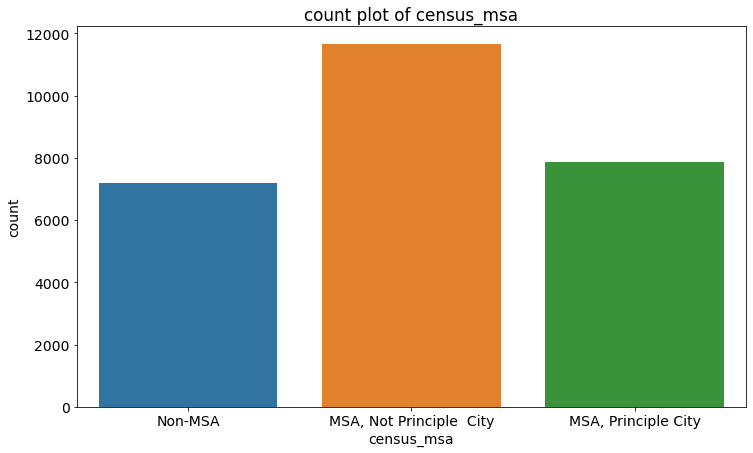

In [1325]:
sns.countplot(x = 'census_msa', data = data)
plt.title('count plot of census_msa')

In [1326]:
ct_cm = pd.crosstab(data.census_msa, data.h1n1_vaccine)
ct_cm

h1n1_vaccine,0,1
census_msa,,
"MSA, Not Principle City",9178,2467
"MSA, Principle City",6183,1681
Non-MSA,5672,1526


In [1327]:
chi2_contingency(ct_cm, correction = False)

(0.11411029118541836,
 0.9445419806029446,
 2,
 array([[9170.97708466, 2474.02291534],
        [6193.26438761, 1670.73561239],
        [5668.75852773, 1529.24147227]]))

**Not a Good Predictor**

# 

# 

# 30) no_of_adults

In [1328]:
data.no_of_adults.isnull().sum()

249

In [1329]:
data.no_of_adults.value_counts()

1.0    14474
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [1330]:
data.no_of_adults.median()

1.0

In [1331]:
data.no_of_adults.fillna(1.0, inplace = True)

In [1332]:
data.no_of_adults.isnull().sum()

0

In [1333]:
data.no_of_adults.describe()

count    26707.000000
mean         0.887558
std          0.749980
min          0.000000
25%          0.000000
50%          1.000000
75%          1.000000
max          3.000000
Name: no_of_adults, dtype: float64

In [1334]:
data.no_of_adults.value_counts()

1.0    14723
0.0     8056
2.0     2803
3.0     1125
Name: no_of_adults, dtype: int64

In [1335]:
data.no_of_adults.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of no_of_adults')

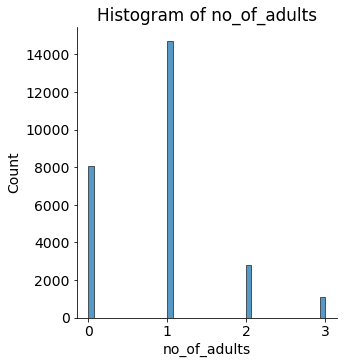

In [1336]:
sns.displot(data.no_of_adults)
plt.title('Histogram of no_of_adults')

Text(0.5, 1.0, 'distribution plot of no_of_adults')

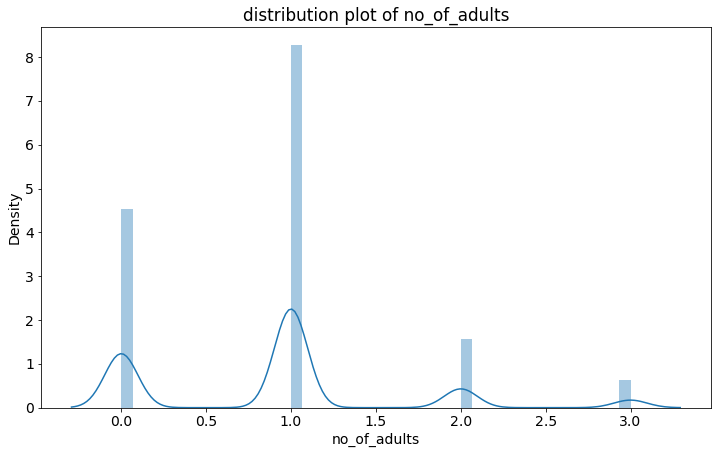

In [1337]:
sns.distplot(data.no_of_adults)
plt.title('distribution plot of no_of_adults')

Text(0.5, 1.0, 'count plot of no_of_adults')

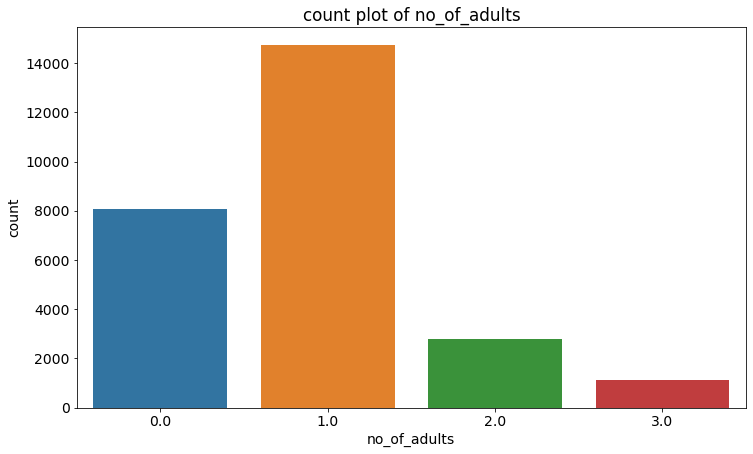

In [1338]:
sns.countplot(x = 'no_of_adults', data = data)
plt.title('count plot of no_of_adults')

Text(0.5, 1.0, 'BoxPlot Of no_of_adults')

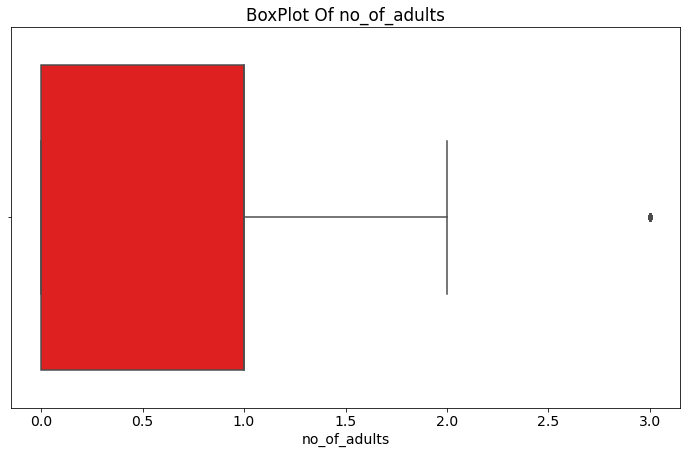

In [1339]:
sns.boxplot(data.no_of_adults, color = 'r')
plt.title('BoxPlot Of no_of_adults')

In [1340]:
IQR = data.no_of_adults.quantile(0.75) - data.no_of_adults.quantile(0.25)
IQR

1.0

In [1341]:
upper_limit = data.no_of_adults.quantile(0.75) + (1.5*IQR)
upper_limit

2.5

In [1342]:
len(data.no_of_adults[data.no_of_adults > upper_limit])

1125

In [1343]:
data['no_of_adults'] = np.where(data['no_of_adults'] > upper_limit, 2, data['no_of_adults'])

Text(0.5, 1.0, 'BoxPlot Of no_of_adults')

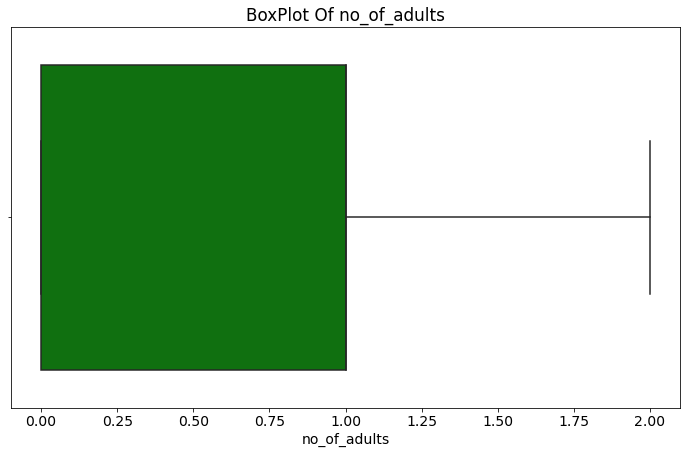

In [1344]:
sns.boxplot(data.no_of_adults, color = 'g')
plt.title('BoxPlot Of no_of_adults')

Text(0.5, 1.0, 'distribution plot of no_of_adults')

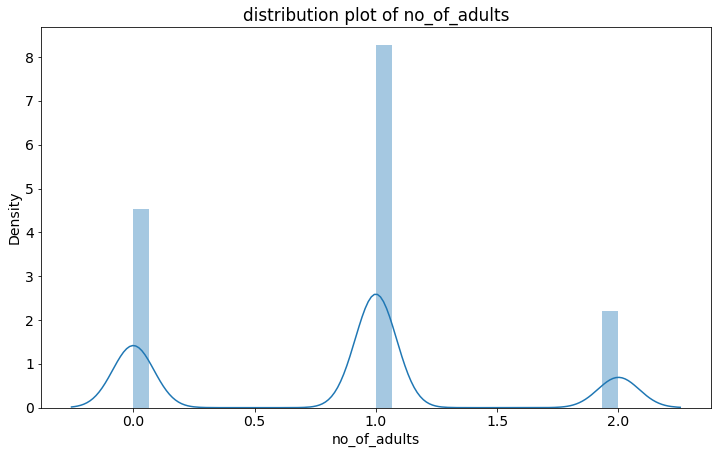

In [1345]:
sns.distplot(data.no_of_adults)
plt.title('distribution plot of no_of_adults')

In [1346]:
data.groupby('no_of_adults')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
no_of_adults,,,,,,,,
0.0,8056.0,0.196748,0.397565,0.0,0.0,0.0,0.0,1.0
1.0,14723.0,0.224411,0.417208,0.0,0.0,0.0,0.0,1.0
2.0,3928.0,0.199847,0.399936,0.0,0.0,0.0,0.0,1.0


In [1347]:
mod_hw = ols('h1n1_vaccine ~ no_of_adults', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
no_of_adults,1.0,0.522684,0.522684,3.124042,0.077157
Residual,26705.0,4468.015228,0.167310,NaN,NaN


**Not a Good Predictor**

# 

# 

# 31) no_of_children

In [1348]:
data.no_of_children.isnull().sum()

249

In [1349]:
data.no_of_children.value_counts()

0.0    18672
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

In [1350]:
data.no_of_children.median()

0.0

In [1351]:
data.no_of_children.fillna(0.0, inplace = True)

In [1352]:
data.no_of_children.isnull().sum()

0

In [1353]:
data.no_of_children.describe()

count    26707.000000
mean         0.529599
std          0.925264
min          0.000000
25%          0.000000
50%          0.000000
75%          1.000000
max          3.000000
Name: no_of_children, dtype: float64

In [1354]:
data.no_of_children.value_counts()

0.0    18921
1.0     3175
2.0     2864
3.0     1747
Name: no_of_children, dtype: int64

In [1355]:
data.no_of_children.value_counts().sum()

26707

Text(0.5, 1.0, 'Histogram of no_of_children')

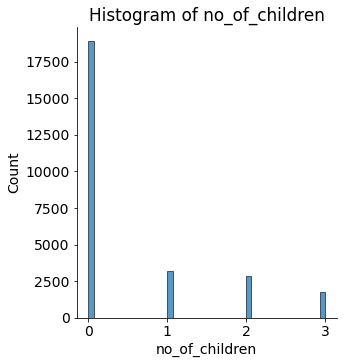

In [1356]:
sns.displot(data.no_of_children)
plt.title('Histogram of no_of_children')

Text(0.5, 1.0, 'distribution plot of no_of_children')

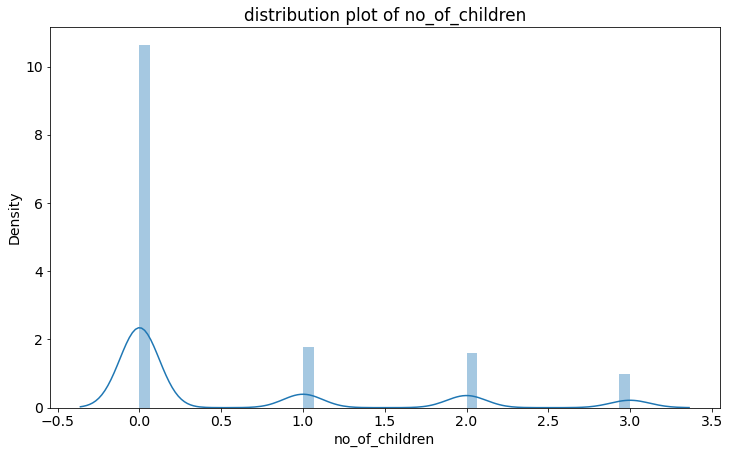

In [1357]:
sns.distplot(data.no_of_children)
plt.title('distribution plot of no_of_children')

Text(0.5, 1.0, 'count plot of no_of_children')

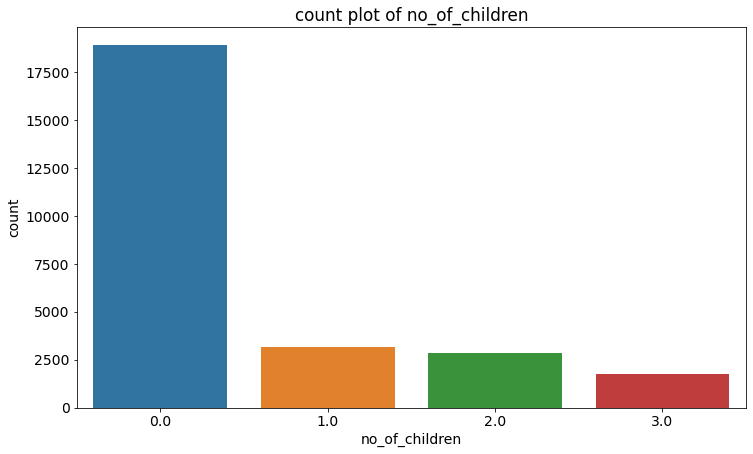

In [1358]:
sns.countplot(x = 'no_of_children', data = data)
plt.title('count plot of no_of_children')

Text(0.5, 1.0, 'BoxPlot Of no_of_children')

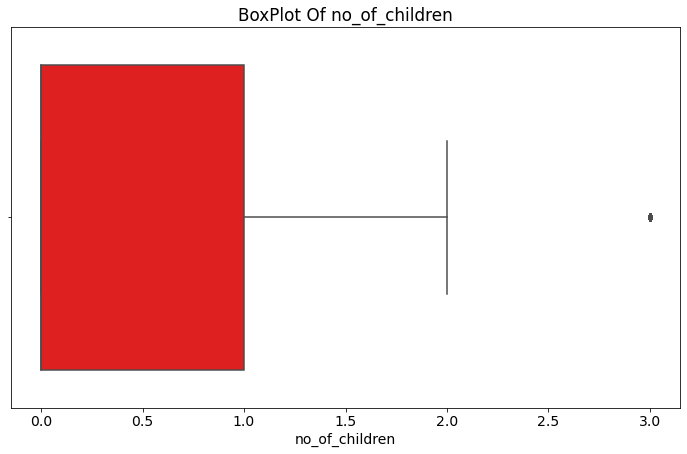

In [1359]:
sns.boxplot(data.no_of_children, color = 'r')
plt.title('BoxPlot Of no_of_children')

In [1360]:
IQR = data.no_of_children.quantile(0.75) - data.no_of_children.quantile(0.25)
IQR

1.0

In [1361]:
upper_limit = data.no_of_children.quantile(0.75) + (1.5*IQR)
upper_limit

2.5

In [1362]:
len(data.no_of_children[data.no_of_children > upper_limit])

1747

In [1363]:
data['no_of_children'] = np.where(data['no_of_children'] > upper_limit, 2, data['no_of_children'])

Text(0.5, 1.0, 'BoxPlot Of no_of_children')

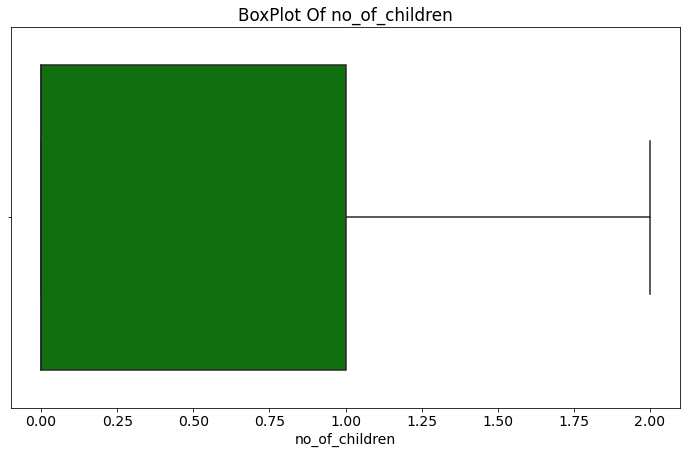

In [1364]:
sns.boxplot(data.no_of_children, color = 'g')
plt.title('BoxPlot Of no_of_children')

Text(0.5, 1.0, 'distribution plot of no_of_children')

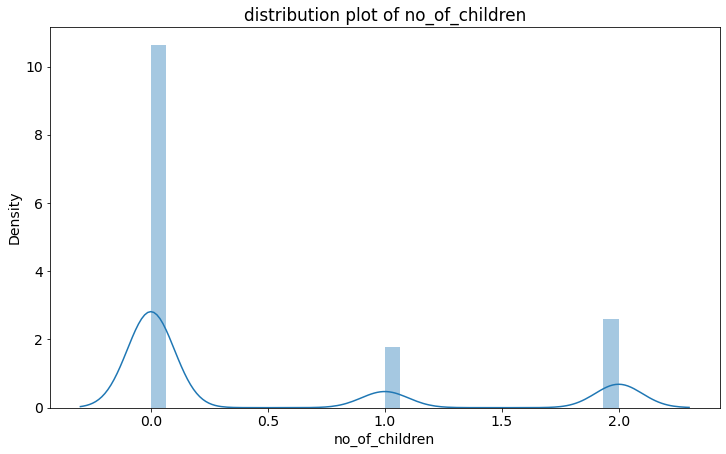

In [1365]:
sns.distplot(data.no_of_children)
plt.title('distribution plot of no_of_children')

In [1366]:
data.groupby('no_of_children')['h1n1_vaccine'].describe()

,count,mean,std,min,25%,50%,75%,max
no_of_children,,,,,,,,
0.0,18921.0,0.212568,0.409135,0.0,0.0,0.0,0.0,1.0
1.0,3175.0,0.212283,0.408989,0.0,0.0,0.0,0.0,1.0
2.0,4611.0,0.212101,0.408841,0.0,0.0,0.0,0.0,1.0


In [1367]:
mod_hw = ols('h1n1_vaccine ~ no_of_children', data = data).fit()
sm.stats.anova_lm(mod_hw)

,df,sum_sq,mean_sq,F,PR(>F)
no_of_children,1.0,0.000905,0.000905,0.005406,0.941391
Residual,26705.0,4468.537007,0.167330,NaN,NaN


**Not a Good Predictor**

# 

# 

# Good Predictor As per P-Value

**h1n1_worry**

**h1n1_awareness**

**antiviral_medication**

**contact_avoidance**

**bought_face_mask**

**wash_hands_frequently**

**avoid_large_gatherings**

**reduced_outside_home_cont**

**avoid_touch_face**

**dr_recc_h1n1_vacc**

**dr_recc_seasonal_vacc**

**chronic_medic_condition**

**cont_child_undr_6_mnths**

**is_health_worker**

**is_h1n1_vacc_effective**

**is_h1n1_risky**

**sick_from_h1n1_vacc**

**is_seas_vacc_effective**

**is_seas_risky**

**age_bracket**

**qualification**

**race**

**sex**

**income_level**

**marital_status**

**housing_status**

**employment**



# NOT Good Predictor As per P-Value

**has_health_insur**

**sick_from_seas_vacc**

**census_msa**

**no_of_adults**

**no_of_children**

# 

# 

# SMOTE

In [1371]:
data1 = data.drop(columns = ['has_health_insur', 'sick_from_seas_vacc', 'census_msa', 'no_of_adults', 'no_of_children'], index = 1).copy()

In [1372]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26706 entries, 0 to 26706
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   h1n1_worry                 26706 non-null  float64
 1   h1n1_awareness             26706 non-null  float64
 2   antiviral_medication       26706 non-null  float64
 3   contact_avoidance          26706 non-null  float64
 4   bought_face_mask           26706 non-null  float64
 5   wash_hands_frequently      26706 non-null  float64
 6   avoid_large_gatherings     26706 non-null  float64
 7   reduced_outside_home_cont  26706 non-null  float64
 8   avoid_touch_face           26706 non-null  float64
 9   dr_recc_h1n1_vacc          26706 non-null  float64
 10  dr_recc_seasonal_vacc      26706 non-null  float64
 11  chronic_medic_condition    26706 non-null  float64
 12  cont_child_undr_6_mnths    26706 non-null  float64
 13  is_health_worker           26706 non-null  flo

# 

# 

# Create predictors and target variable

In [1376]:
x = data1.loc[:, data1.columns != 'h1n1_vaccine']
y = data1.loc[:, data1.columns == 'h1n1_vaccine']

In [1377]:
y.value_counts()

h1n1_vaccine
0               21032
1                5674
dtype: int64

# 

# 

# 30 % test data

In [1381]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 0)

In [1382]:
x_train.shape

(18694, 27)

In [1383]:
x_test.shape

(8012, 27)

In [1384]:
y_train.shape

(18694, 1)

In [1385]:
y_test.shape

(8012, 1)

# 

# 

# Join horizontally x_train and y_train

In [1386]:
train = x_train.join(y_train)

In [1387]:
train.shape

(18694, 28)

# Join horizontally x_test and y_test

In [1388]:
test = x_test.join(y_test)

In [1389]:
test.shape

(8012, 28)

# 

# 

# Count the imbalanced categories

In [1390]:
not_vac = train[train.h1n1_vaccine == 0]
len(not_vac)

14706

In [1391]:
vac = train[train.h1n1_vaccine == 1]
len(vac)

3988

# 

# 

# Make minority class = majority class

In [1392]:
vac_os = resample(vac, replace = True, n_samples = len(not_vac), random_state = 27)

In [1393]:
train_os = pd.concat([not_vac, vac_os])

In [1394]:
train_os.h1n1_vaccine.value_counts()

0    14706
1    14706
Name: h1n1_vaccine, dtype: int64

# 

# 

# Now make oversampled x_train(os) & y_train(os)

In [1395]:
x_trainos = train_os.loc[:, train_os.columns != 'h1n1_vaccine']
y_trainos = train_os.loc[:, train_os.columns == 'h1n1_vaccine']

In [1396]:
x_trainos.shape

(29412, 27)

In [1397]:
y_trainos.shape

(29412, 1)

# 

# 

# Model With Good Predictors

In [1398]:
model_1 = smf.glm(formula = 'h1n1_vaccine ~ h1n1_worry + h1n1_awareness + antiviral_medication + contact_avoidance + bought_face_mask + wash_hands_frequently + avoid_large_gatherings + reduced_outside_home_cont + avoid_touch_face + dr_recc_h1n1_vacc + dr_recc_seasonal_vacc + chronic_medic_condition + cont_child_undr_6_mnths + is_health_worker + is_h1n1_vacc_effective + is_h1n1_risky + sick_from_h1n1_vacc + is_seas_vacc_effective + is_seas_risky + age_bracket + qualification + race + sex + income_level + marital_status + housing_status + employment', data = train_os, family=sm.families.Binomial()).fit()
print(model_1.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           h1n1_vaccine   No. Observations:                29412
Model:                            GLM   Df Residuals:                    29375
Model Family:                Binomial   Df Model:                           36
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14851.
Date:                Mon, 10 Jan 2022   Deviance:                       29702.
Time:                        14:37:25   Pearson chi2:                 3.04e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

# 

# 

# Model With P < 0.05 Columns

**age_bracket**

In [1399]:
train_os['age_bracket'].value_counts()

65+ Years        7754
55 - 64 Years    6390
45 - 54 Years    5605
18 - 34 Years    5578
35 - 44 Years    4085
Name: age_bracket, dtype: int64

In [1400]:
train_os["age_bracket"].replace('45 - 54 Years', '18 - 34 Years', inplace = True)

In [1401]:
train_os['age_bracket'].value_counts()

18 - 34 Years    11183
65+ Years         7754
55 - 64 Years     6390
35 - 44 Years     4085
Name: age_bracket, dtype: int64

# 

In [1402]:
test['age_bracket'].value_counts()

65+ Years        2070
55 - 64 Years    1676
45 - 54 Years    1560
18 - 34 Years    1543
35 - 44 Years    1163
Name: age_bracket, dtype: int64

In [1403]:
test["age_bracket"].replace('45 - 54 Years', '18 - 34 Years', inplace = True)

In [1404]:
test['age_bracket'].value_counts()

18 - 34 Years    3103
65+ Years        2070
55 - 64 Years    1676
35 - 44 Years    1163
Name: age_bracket, dtype: int64

# 

# 

**qualification**

In [1407]:
train_os['qualification'].value_counts()

College Graduate    13187
Some College         7730
12 Years             6051
< 12 Years           2444
Name: qualification, dtype: int64

In [1408]:
train_os["qualification"].replace('Some College', '12 Years', inplace = True)

In [1409]:
train_os['qualification'].value_counts()

12 Years            13781
College Graduate    13187
< 12 Years           2444
Name: qualification, dtype: int64

# 

In [1411]:
test['qualification'].value_counts()

College Graduate    3480
Some College        2103
12 Years            1752
< 12 Years           677
Name: qualification, dtype: int64

In [1412]:
test["qualification"].replace('Some College', '12 Years', inplace = True)

In [1413]:
test['qualification'].value_counts()

12 Years            3855
College Graduate    3480
< 12 Years           677
Name: qualification, dtype: int64

# 

# 

In [1414]:
model_2 = smf.glm(formula = 'h1n1_vaccine ~ h1n1_worry + h1n1_awareness + antiviral_medication + contact_avoidance + bought_face_mask + wash_hands_frequently + avoid_large_gatherings + dr_recc_h1n1_vacc + dr_recc_seasonal_vacc + chronic_medic_condition + is_health_worker + is_h1n1_vacc_effective + is_h1n1_risky + is_seas_vacc_effective + is_seas_risky + age_bracket + qualification + race + sex + marital_status', data = train_os, family=sm.families.Binomial()).fit()
print(model_2.summary())

                 Generalized Linear Model Regression Results                  
Dep. Variable:           h1n1_vaccine   No. Observations:                29412
Model:                            GLM   Df Residuals:                    29386
Model Family:                Binomial   Df Model:                           25
Link Function:                  logit   Scale:                          1.0000
Method:                          IRLS   Log-Likelihood:                -14860.
Date:                Mon, 10 Jan 2022   Deviance:                       29720.
Time:                        14:37:27   Pearson chi2:                 3.04e+04
No. Iterations:                     5                                         
Covariance Type:            nonrobust                                         
                                        coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------------------------
Interc

In [1415]:
train_os1 = train_os[['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'is_seas_vacc_effective', 'is_seas_risky', 'age_bracket', 'qualification', 'race', 'sex', 'marital_status', 'h1n1_vaccine']]

In [1416]:
train_os1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29412 entries, 24941 to 10150
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   h1n1_worry               29412 non-null  float64
 1   h1n1_awareness           29412 non-null  float64
 2   antiviral_medication     29412 non-null  float64
 3   contact_avoidance        29412 non-null  float64
 4   bought_face_mask         29412 non-null  float64
 5   wash_hands_frequently    29412 non-null  float64
 6   avoid_large_gatherings   29412 non-null  float64
 7   dr_recc_h1n1_vacc        29412 non-null  float64
 8   dr_recc_seasonal_vacc    29412 non-null  float64
 9   chronic_medic_condition  29412 non-null  float64
 10  is_health_worker         29412 non-null  float64
 11  is_h1n1_vacc_effective   29412 non-null  float64
 12  is_h1n1_risky            29412 non-null  float64
 13  is_seas_vacc_effective   29412 non-null  float64
 14  is_seas_risky     

In [1433]:
x_trainos1 = train_os1.loc[:, train_os1.columns != 'h1n1_vaccine']

In [1417]:
test1 = test[['h1n1_worry', 'h1n1_awareness', 'antiviral_medication', 'contact_avoidance', 'bought_face_mask', 'wash_hands_frequently', 'avoid_large_gatherings', 'dr_recc_h1n1_vacc', 'dr_recc_seasonal_vacc', 'chronic_medic_condition', 'is_health_worker', 'is_h1n1_vacc_effective', 'is_h1n1_risky', 'is_seas_vacc_effective', 'is_seas_risky', 'age_bracket', 'qualification', 'race', 'sex', 'marital_status', 'h1n1_vaccine']]
test1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 8829 to 11856
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   h1n1_worry               8012 non-null   float64
 1   h1n1_awareness           8012 non-null   float64
 2   antiviral_medication     8012 non-null   float64
 3   contact_avoidance        8012 non-null   float64
 4   bought_face_mask         8012 non-null   float64
 5   wash_hands_frequently    8012 non-null   float64
 6   avoid_large_gatherings   8012 non-null   float64
 7   dr_recc_h1n1_vacc        8012 non-null   float64
 8   dr_recc_seasonal_vacc    8012 non-null   float64
 9   chronic_medic_condition  8012 non-null   float64
 10  is_health_worker         8012 non-null   float64
 11  is_h1n1_vacc_effective   8012 non-null   float64
 12  is_h1n1_risky            8012 non-null   float64
 13  is_seas_vacc_effective   8012 non-null   float64
 14  is_seas_risky       

# 

# 

# Test data in two parts

In [1418]:
x_test = test1.loc[:, test1.columns != 'h1n1_vaccine']
x_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8012 entries, 8829 to 11856
Data columns (total 20 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   h1n1_worry               8012 non-null   float64
 1   h1n1_awareness           8012 non-null   float64
 2   antiviral_medication     8012 non-null   float64
 3   contact_avoidance        8012 non-null   float64
 4   bought_face_mask         8012 non-null   float64
 5   wash_hands_frequently    8012 non-null   float64
 6   avoid_large_gatherings   8012 non-null   float64
 7   dr_recc_h1n1_vacc        8012 non-null   float64
 8   dr_recc_seasonal_vacc    8012 non-null   float64
 9   chronic_medic_condition  8012 non-null   float64
 10  is_health_worker         8012 non-null   float64
 11  is_h1n1_vacc_effective   8012 non-null   float64
 12  is_h1n1_risky            8012 non-null   float64
 13  is_seas_vacc_effective   8012 non-null   float64
 14  is_seas_risky       

# 

In [1419]:
y_test = test1.loc[:, test1.columns == 'h1n1_vaccine']
y_test

,h1n1_vaccine
8829,0
1972,0
7696,0
22534,0
19328,0
...,...
2270,0
23059,1
23996,0
8262,0


# 

# Predictions on test data

In [1420]:
predictions = model_2.predict(x_test)
pred_1 = [0 if x < 0.5 else 1 for x in predictions]
pred_1

[0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 0,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,


# 

# 

In [1421]:
from sklearn.metrics import confusion_matrix, classification_report
print(confusion_matrix(test1["h1n1_vaccine"], pred_1))
print(classification_report(test1["h1n1_vaccine"], pred_1, digits = 3))

[[4991 1335]
 [ 449 1237]]
              precision    recall  f1-score   support

           0      0.917     0.789     0.848      6326
           1      0.481     0.734     0.581      1686

    accuracy                          0.777      8012
   macro avg      0.699     0.761     0.715      8012
weighted avg      0.826     0.777     0.792      8012



# 

# 

In [960]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score

# 

# Replace category with integer

In [1438]:
x_trainos1["age_bracket"].replace('18 - 34 Years',0,inplace = True)
x_trainos1["age_bracket"].replace('35 - 44 Years',1,inplace = True)
x_trainos1["age_bracket"].replace('55 - 64 Years',2,inplace = True)
x_trainos1["age_bracket"].replace('65+ Years',3,inplace = True)

In [1446]:
x_trainos1["qualification"].replace('< 12 Years',0,inplace = True)
x_trainos1["qualification"].replace('12 Years',1,inplace = True)
x_trainos1["qualification"].replace('College Graduate',2,inplace = True)

In [1447]:
x_trainos1["race"].replace('Black',0,inplace = True)
x_trainos1["race"].replace('White',1,inplace = True)
x_trainos1["race"].replace('Hispanic',2,inplace = True)
x_trainos1["race"].replace('Other or Multiple',3,inplace = True)

In [1458]:
x_trainos1["sex"].replace('Female',0,inplace = True)
x_trainos1["sex"].replace('Male',1,inplace = True)

In [1454]:
x_trainos1["marital_status"].replace('Married',0,inplace = True)
x_trainos1["marital_status"].replace('Not Married',1,inplace = True)

# 

# 

In [1460]:
clf_reg = LogisticRegression()
clf_reg.fit(x_trainos1, y_trainos)
y_score = clf_reg.predict_proba(x_trainos1)[:,1]
false_positive_rate, true_positive_rate, threshold = roc_curve(y_trainos, y_score)
print('roc_auc_score for Logistic Regression: ', roc_auc_score(y_trainos, y_score))

roc_auc_score for Logistic Regression:  0.8315256857518103


# 

# 

# Plot

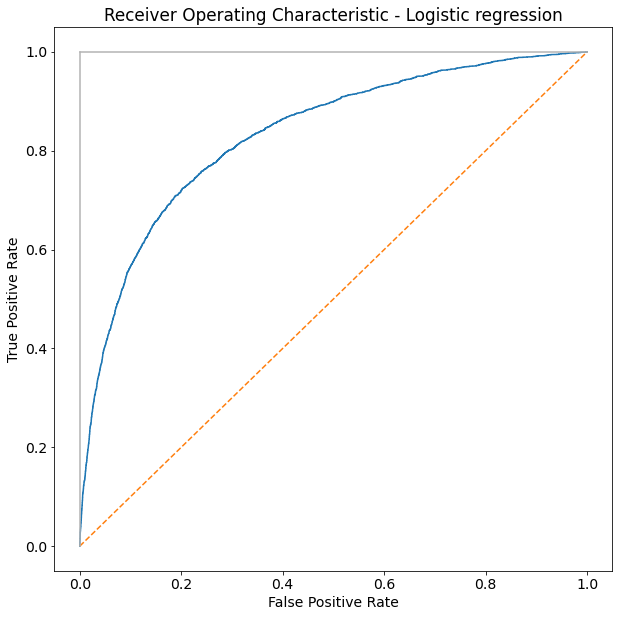

In [1461]:
plt.subplots(1, figsize=(10,10))
plt.title('Receiver Operating Characteristic - Logistic regression')
plt.plot(false_positive_rate, true_positive_rate)
plt.plot([0, 1], ls="--")
plt.plot([0, 0], [1, 0] , c=".7"), plt.plot([1, 1] , c=".7")
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.show()
